In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import unicodedata as ud
from jupyter_core.migrate import regex
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_pickle('../data/cleaning_final_dataset_from_scrape_22022025.pkl')

### We rename the columns related to the extras

In [3]:
idx_init = dataset.columns.get_loc('antique')
idx_end = dataset.columns.get_loc('esp')

for idx in range(idx_init, idx_end + 1):
    dataset.rename(columns={dataset.columns[idx] : 'extra_' + dataset.iloc[:,idx].name}, inplace=True)

In [4]:
dataset.loc[:,dataset.columns.str.contains('extra')] = dataset.loc[:,dataset.columns.str.contains('extra')].astype('boolean')

### Distribution of raw price

Here we notice a particularity for the prices of luxury cars. Users tend to mention the price in an abnormal way. we see that users tend to report a 1.0 when they want to negotiate the price, and sometimes users write 100 for 100k.

We also see that 99% of the luxury cars are below 317 000 which seems reasonable. Therefore we will remove anything above 350000 euros.

In [5]:
dataset.raw_price.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    1.129440e+05
mean     1.495445e+04
std      1.972543e+04
min      1.000000e+00
1%       1.000000e+02
5%       1.800000e+03
10%      3.000000e+03
25%      6.000000e+03
50%      1.050000e+04
75%      1.700000e+04
90%      2.830000e+04
95%      4.100000e+04
99%      9.000000e+04
max      1.111111e+06
Name: raw_price, dtype: float64

In [7]:
dataset.loc[dataset.brand.str.contains('rolls|ferrari|bentley|aston|porsche|land|mclaren',regex=True),'raw_price'].describe([0.01,0.05,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

count    2.740000e+03
mean     6.000188e+04
std      6.098862e+04
min      1.000000e+00
1%       1.000000e+02
5%       5.999000e+03
10%      1.250000e+04
15%      1.620000e+04
20%      2.000000e+04
25%      2.490000e+04
50%      4.585000e+04
75%      7.500000e+04
90%      1.199550e+05
95%      1.670000e+05
99%      3.176350e+05
max      1.111111e+06
Name: raw_price, dtype: float64

In [9]:
# Let's check the car brands with a price less than 500

In [10]:
dataset.loc[dataset.raw_price<500].shape

(1837, 141)

In [11]:
#We notice that we have a mix of luxury cars with abnormal price mentions, cars for recycling, spare parts mentioned as car. We will delete cars selling below 500 euros as a job expertise based rule. we will consider this abnormal ads.

In [12]:
dataset.shape

(112944, 141)

In [13]:
dataset.extra_antique.value_counts()

extra_antique
False    87362
True       706
Name: count, dtype: int64

In [14]:
dataset.columns[dataset.columns.str.contains('cras')]

Index(['crashed', 'extra_never_crashed'], dtype='object')

In [15]:
# 147 cars mentioned to be  crashed but have never been crashed. This has to be corrected.
dataset.loc[(dataset.crashed)&(dataset.extra_never_crashed == True)]

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
230,39.197300,26.284617,b077718e-86eb-449a-b68f-280f73022998,False,NaN,Opel Tigra '05 90HP ΑΤΡΑΚΑΡΙΣΤΟ 1 χερι,"{'count': 6, 'urls': ['https://static.car.gr/3...",3536161,True,1001126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,2.0,False
284,37.988455,23.724908,8f1ae10d-8365-4dc1-a6ef-e3b1b672dae7,False,NaN,Jeep Grand Cherokee '02 LIMITED,"{'count': 6, 'urls': ['https://static.car.gr/4...",4219209,True,1002153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,5.0,True
298,39.197300,26.284617,6dba5c6e-2134-40c0-acf8-5536c887e5d5,False,NaN,Smart ForTwo '06 600CC,"{'count': 3, 'urls': ['https://static.car.gr/4...",4378430,True,1001126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RWD,2.0,False
716,40.495672,23.001112,50e81417-1d60-41cf-9b2e-6f7bf73a7bff,False,NaN,Ford Mondeo '04 DIESEL TURBO,"{'count': 6, 'urls': ['https://static.car.gr/8...",8281946,True,1003816,...,1429.0,hatchback,4731.0,208.0,2.0 TDCi Ambiente,2754.0,6.0,FWD,5.0,True
717,40.500457,22.944690,5e0b1924-70ba-49ce-9113-3bf38aab7189,False,NaN,Ford Mondeo '04 DIESEL TURBO,"{'count': 6, 'urls': ['https://static.car.gr/8...",8281948,True,1003825,...,1429.0,hatchback,4731.0,208.0,2.0 TDCi Ambiente,2754.0,6.0,FWD,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107417,38.897624,22.434065,3b564bae-2655-42aa-8a23-d5f53e57fa6d,False,NaN,Citroen C2 '03 VTR,"{'count': 2, 'urls': ['https://static.car.gr/3...",343464153,True,4689653,...,1474.0,hatchback,3666.0,169.0,1.4 SX Gold-Edition,2315.0,6.1,FWD,3.0,True
107532,38.062237,23.782944,de9550af-fb5f-4947-b5d7-a18b895c0dc1,False,NaN,Volkswagen Jetta '07 TSI 140 ιπποι θελει κινη...,"{'count': 6, 'urls': ['https://static.car.gr/3...",343477670,True,3027364,...,1459.0,sedan,4554.0,207.0,1.4 TSI Comfortline,2575.0,7.1,FWD,5.0,True
109310,39.675592,21.659741,fec8d934-a594-459b-8abb-845c897a999b,False,NaN,Citroen C5 '04,"{'count': 6, 'urls': ['https://static.car.gr/3...",343853732,True,1000262787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,5.0,False
112676,40.828553,22.384870,60a83404-cedb-4dcb-8a03-428b7adc2b99,False,NaN,Mitsubishi Lancer '09 1.5 Invite,"{'count': 7, 'urls': ['https://static.car.gr/3...",344549607,True,1004808,...,1490.0,sedan,4570.0,189.0,1.5 Invite,2635.0,6.1,FWD,5.0,False


In [16]:
dataset.loc[dataset.crashed].sort_values(by='raw_price',ascending=False)

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
90866,37.836293,21.407692,9de3167a-08f5-4650-bdc3-4fbbf917e140,False,NaN,Jeep Wrangler '19 Πρόβλημα στο μοτέρ,"{'count': 17, 'urls': ['https://static.car.gr/...",334611978,True,1000272855,...,NaN,NaN,NaN,NaN,NaN,NaN,9,4WD,5.0,False
109554,38.027763,23.705165,b0555ce8-67c0-4e12-a7e0-19cf4c408548,False,NaN,Ford Mustang '17 2.3 έχει πάρει σασί,"{'count': 1, 'urls': ['https://static.car.gr/3...",343875393,True,1000452679,...,NaN,NaN,NaN,NaN,NaN,NaN,16,RWD,2.0,False
65896,38.020607,23.640482,05130c1e-97c9-41f1-96ec-882cfabe6e61,False,NaN,Toyota RAV 4 '23 BLACK EDITION PANORAMIC,"{'count': 27, 'urls': ['https://static.car.gr/...",43990663,False,1000095195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,False
30650,38.042984,23.715675,4e171fb4-f10f-4298-979c-f6acdf769e45,False,NaN,Tesla Model Y '23,"{'count': 17, 'urls': ['https://static.car.gr/...",42583993,True,1001892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,False
59183,37.870332,23.857050,2af1c1db-ea63-44ec-8dc6-48c5af173dc6,False,NaN,Bmw 530 '23 E XDrive 4X4 292ps FULL EXTRA,"{'count': 37, 'urls': ['https://static.car.gr/...",43804087,False,1159472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,40.255877,23.296292,fd823383-ac45-40fb-bc18-3bd6bc44a531,False,NaN,Volkswagen Golf '98 !μονο για ανταλλακτικα!,"{'count': 5, 'urls': ['https://static.car.gr/3...",36838161,True,1006781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,False
3607,40.255877,23.296292,715144ee-e912-4c81-8b1d-27d3d3a404e8,False,NaN,Volkswagen Taro '97 !μονο για ανταλλακτικά!,"{'count': 10, 'urls': ['https://static.car.gr/...",36838466,True,1006781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False
93876,40.086797,21.420258,a165034a-8a80-4d3a-a3ca-0d4bfea3fc5d,False,NaN,Hyundai i 10 '14,"{'count': 5, 'urls': ['https://static.car.gr/3...",337173908,True,3026684,...,1500.0,hatchback,3665.0,155.0,1.0,2385.0,4.7,FWD,5.0,False
65497,39.352691,22.943944,7d65facc-22db-47dc-a1af-9cae8dab906d,False,NaN,Seat Ibiza '01 IBIZA 1.4 16V,"{'count': 8, 'urls': ['https://static.car.gr/4...",43984880,True,1001479704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False


In [17]:
#We have above 20 000 ads which have already been crashed but mention it isn't crashed. Judging from the descriptions the column crashed indicates cars which are sold crashed and need repairs whereas never crashed is an indicator of wether the car has been crashed in the past or not.
dataset.loc[(dataset.crashed==False)&(dataset.extra_never_crashed == False)&((dataset.extra_never_crashed.notna()))]

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
0,40.537681,22.991531,fb208079-b3a1-4187-abe1-c3532386445c,False,NaN,Kia Sportage '02 LIMIDET DERMA FULL EXTRA,"{'count': 7, 'urls': ['https://static.car.gr/1...",11709,True,3027523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,2.0,True
3,40.271180,22.533929,a47702b9-4b30-47aa-8e0c-2bd1bdaa151d,False,NaN,Lincoln Town Car '07 STRECH LIMO TIFFANIS,"{'count': 5, 'urls': ['https://static.car.gr/6...",67361,True,3026787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RWD,4.0,False
13,38.939962,22.870946,f2256d2b-807d-4c8b-bf8b-1115c681c7cc,False,NaN,Mazda MX-5 '90 miata,"{'count': 15, 'urls': ['https://static.car.gr/...",233469,True,3027099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RWD,2.0,False
18,37.619366,22.759940,237d7aa1-bf02-492f-a49a-53a232833348,False,NaN,Jeep Cherokee '03,"{'count': 7, 'urls': ['https://static.car.gr/2...",248955,True,1006024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,5.0,True
19,37.619366,22.759940,b7d38fa3-4a64-439a-ae00-8ef4e85fcc24,False,NaN,Chrysler PT Cruiser '02,"{'count': 18, 'urls': ['https://static.car.gr/...",248999,True,1006024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113867,36.369106,28.194754,c9d5fdf0-cdf6-49f4-8bb3-b471f59ca422,False,NaN,Renault Clio '19 AUTHENTIC ΜΕ ΦΠΑ,"{'count': 14, 'urls': ['https://static.car.gr/...",346975189,False,1000686,...,1448.0,hatchback,4063.0,178.0,ENERGY TCe 75 Life,2589.0,5.0,FWD,5.0,False
113868,36.369106,28.194754,3878979e-a813-479d-95e3-51473d30768d,False,NaN,Seat Mii '19 STYLE ECOMOTIVE ΜΕ ΦΠΑ,"{'count': 1, 'urls': ['https://static.car.gr/3...",346975191,True,1000686,...,1478.0,hatchback,3557.0,161.0,1.0 Start&amp;Stop Style,2420.0,5.2,FWD,5.0,False
113869,36.369106,28.194754,3884d605-d012-41ff-8619-8d642754d05f,False,NaN,Kia Picanto '21 LX INMOTION ΜΕ ΦΠΑ,"{'count': 15, 'urls': ['https://static.car.gr/...",346975195,False,1000686,...,1485.0,hatchback,3595.0,161.0,1.0 Attract,2400.0,4.4,FWD,5.0,False
113870,36.369106,28.194754,7d381d05-87e9-440b-a19e-8bc918ed1a4b,False,NaN,Fiat Panda '19 EASY ΜΕ ΦΠΑ,"{'count': 14, 'urls': ['https://static.car.gr/...",346975197,False,1000686,...,1551.0,hatchback,3653.0,164.0,1.2 8V Easy,2300.0,5.9,FWD,5.0,False


In [18]:
#We see that 75% of crashed cars are sold below 4000 euros.
dataset.loc[dataset.crashed,'raw_price'].describe()

count     2967.000000
mean      2158.806202
std       3205.020640
min          1.000000
25%        400.000000
50%       1100.000000
75%       2500.000000
max      39500.000000
Name: raw_price, dtype: float64

In [19]:
dataset.loc[dataset.extra_leasing == True,'raw_price'].describe()

count       75.000000
mean     11499.466667
std      14743.809475
min          1.000000
25%        300.000000
50%       7600.000000
75%      17200.000000
max      69500.000000
Name: raw_price, dtype: float64

## Cleaning unwanted data (To be modified: remove engine size < 600

In [20]:
dataset = dataset[
    dataset.raw_price.notnull() &
    dataset.model.notnull() &
    (dataset.registration_year > 2000) &
    (dataset.registration_year < 2026) &
    (dataset.extra_antique!= True) &
    (dataset.raw_price > 500) &
    (dataset.raw_price < 350000)&
    (dataset.extra_leasing != True)
].copy().reset_index(drop=True)

#add rule that non electric/ gas cars should have >600 engine size

In [21]:
dataset.loc[dataset.crashed &(dataset.extra_never_crashed == True),'extra_never_crashed'] = False

In [22]:
dataset.drop(columns=['extra_leasing', 'extra_antique'], inplace=True)

In [23]:
dataset = dataset.loc[dataset.groupby('brand')['brand'].transform('count')>5].copy().reset_index(drop=True)

In [24]:
ud.unidecode(dataset.description.iloc[12])

AttributeError: module 'unicodedata' has no attribute 'unidecode'

In [25]:
def remove_accents_from_description(description):
    if type(description) == str:
        d = {ord('\N{COMBINING ACUTE ACCENT}'):None}
        return ud.normalize('NFD',description).lower().translate(d) if description else description
    return description


In [26]:
dataset['description'] = dataset.description.apply(remove_accents_from_description)

In [45]:
dataset.loc[dataset.description.str.contains(r'(?<!δεν )θελει|(?<!δεν )χρειαζεται|για ανταλλακτικα|gia antalaktika|(?<!den )thelei|(?<!den )xreiazetai', regex=True)&dataset.description.notna(),['crashed','extra_never_crashed','raw_price','description']]

,crashed,extra_never_crashed,raw_price,description
10,True,False,2500.0,πρωτο χερι ελληνικης αντιπροσωπειας ιωαννηδης...
169,True,False,1234.0,για ανταλλακτικα η κυκλοφορια . χωρις μοτερ -α...
180,False,True,7990.0,ατρακαριστο - περα απο καποιες μικρογρατσουνιε...
203,False,True,10500.0,"δεν ειναι για ""σκοτωμα""... ειναι σε αριστη κατ..."
206,True,False,1990.0,το αυτοκινητο δινεται για κυκλοφορια η'...
...,...,...,...,...
100353,False,<NA>,1000.0,μονο ταξι η ανταλλακτικα \n\nαποχαρακτιρισμενο...
100402,False,True,3500.0,το αυτοκινητο αγοραστηκε καινουργιο σαζμαν και...
100431,True,False,5700.0,το αυτοκινητο ειναι ατρακαριστο !!πρωτο χερι μ...
100434,False,True,6990.0,hyundai i10 1.1 \n\n!!!95.774 klm!!!\n\nαριστο...


In [ ]:
dataset[dataset.description.str.contains('θε')]

In [221]:
dataset.raw_price.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    101443.000000
mean      15798.984868
std       18271.262812
min         515.000000
1%         1500.000000
5%         2999.000000
10%        4000.000000
25%        7100.000000
50%       11400.000000
75%       17900.000000
90%       29480.000000
95%       42800.000000
99%       90895.000000
max      345000.000000
Name: raw_price, dtype: float64

In [198]:
dataset.loc[dataset.raw_price<2000,'brand'].unique()

array(['renault', 'seat', 'suzuki', 'nissan', 'audi', 'alfa romeo',
       'citroen', 'smart', 'peugeot', 'volvo', 'chevrolet', 'opel',
       'skoda', 'mitsubishi', 'lada', 'honda', 'hyundai', 'fiat', 'mg',
       'daihatsu', 'lancia', 'daewoo', 'kia', 'china-motors',
       'volkswagen', 'subaru', 'ford', 'aixam', 'porsche', 'jeep',
       'toyota', 'bmw', 'mazda', 'mercedes-benz', 'rover', 'land rover',
       'jaguar', 'chrysler', 'saab', 'ssangyong'], dtype=object)

In [199]:
#We see that we have removed luxury cars with abnormal prices. We see however some mercedes, volvo, bmw, audi. Let's see why they are so cheap

In [201]:
dataset[(dataset.raw_price<2000)&(dataset.brand.isin(['kia','daewoo']))].head(10)

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,vehicle_width,body_type,vehicle_length,top_speed,trim,wheelbase,fuel_consumption,drive_type,doors,is_metallic
135,37.582091,22.828592,f1760e84-541e-4823-a852-8d38f9362250,False,NaN,Daewoo Evanda '06 Chevrolet Evanda 2006 2000CC,"{'count': 10, 'urls': ['https://static.car.gr/...",6281874,True,1002204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,4.0,False
426,35.504138,24.015647,99a80f01-eaf3-43e8-96d9-51fb6487fa6a,False,NaN,Kia Shuma '01,"{'count': 5, 'urls': ['https://static.car.gr/1...",11405610,True,1001750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,False
982,40.735464,22.847695,b1e93be7-7f58-4c2c-b1a2-3df92c25ff10,False,NaN,Kia Sorento '04 2.5 crdi,"{'count': 17, 'urls': ['https://static.car.gr/...",24461702,True,3577679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,5.0,True
986,37.668664,21.450610,242aa841-8603-44a4-bd73-ef0557340d9d,False,NaN,Kia Sorento '04 G6CU,"{'count': 5, 'urls': ['https://static.car.gr/2...",24563300,True,1004178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,5.0,True
1605,37.966287,23.919872,345ae0b8-4d2c-4cae-8026-0cc6e72a5c23,False,NaN,Daewoo Matiz '03,"{'count': 3, 'urls': ['https://static.car.gr/3...",33387046,True,1007699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,True
4545,38.236903,21.743329,f54d8752-27b3-4f75-8bb0-c88b2f4b7e15,False,NaN,Kia Sportage '02 4x4 Cabrio,"{'count': 3, 'urls': ['https://static.car.gr/4...",41458587,True,10071159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4WD,2.0,False
8168,38.001716,23.695140,53671b74-3dfe-4998-b361-da1fb6eaad20,False,NaN,Kia Pride '01,"{'count': 7, 'urls': ['https://static.car.gr/4...",41597858,True,1001053225,...,NaN,NaN,NaN,NaN,NaN,NaN,"4,50",FWD,5.0,False
11291,39.766142,19.822586,97ad099d-a8fb-4274-9d2d-b679b2e1fa9b,False,NaN,Daewoo Matiz '01 SE A/C υδρ.τιμονι κεντρικο κλ.,"{'count': 1, 'urls': ['https://static.car.gr/4...",41740340,True,1001085647,...,NaN,NaN,NaN,NaN,NaN,NaN,"4,50",FWD,5.0,True
13024,37.928157,23.729474,9ce3f27f-bf42-45f9-a709-1c25ec19b86e,False,NaN,Daewoo Matiz '02 MATIZ 800CC AC,"{'count': 8, 'urls': ['https://static.car.gr/4...",41800713,True,1001100265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FWD,4.0,False
13961,41.019455,22.950164,95e38ec8-09fb-4653-a6cc-342b4d8b8c46,False,NaN,Daewoo Lanos '02 2002,"{'count': 9, 'urls': ['https://static.car.gr/4...",41838041,False,1001106521,...,NaN,NaN,NaN,NaN,NaN,NaN,8,FWD,5.0,True


In [ ]:
#We see a leasing ad, a mercedes for recycling,

Add extra to extra columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 [Text(0, 0, 'extra_abs'),
  Text(1, 0, 'extra_power_windows'),
  Text(2, 0, 'extra_immobilizer'),
  Text(3, 0, 'extra_power_steering'),
  Text(4, 0, 'extra_central_locking'),
  Text(5, 0, 'extra_power_mirrors'),
  Text(6, 0, 'extra_esp'),
  Text(7, 0, 'extra_never_crashed'),
  Text(8, 0, 'extra_bluetooth'),
  Text(9, 0, 'extra_aircondition(a_c)'),
  Text(10, 0, 'extra_service_book'),
  Text(11, 0, 'extra_usb'),
  Text(12, 0, 'extra_trip_computer'),
  Text(13, 0, 'extra_multi_purpose_steering_wheel'),
  Text(14, 0, 'extra_alumium_rims'),
  Text(15, 0, 'extra_isofix_children_seats'),
  Text(16, 0, 'extra_fog_lig

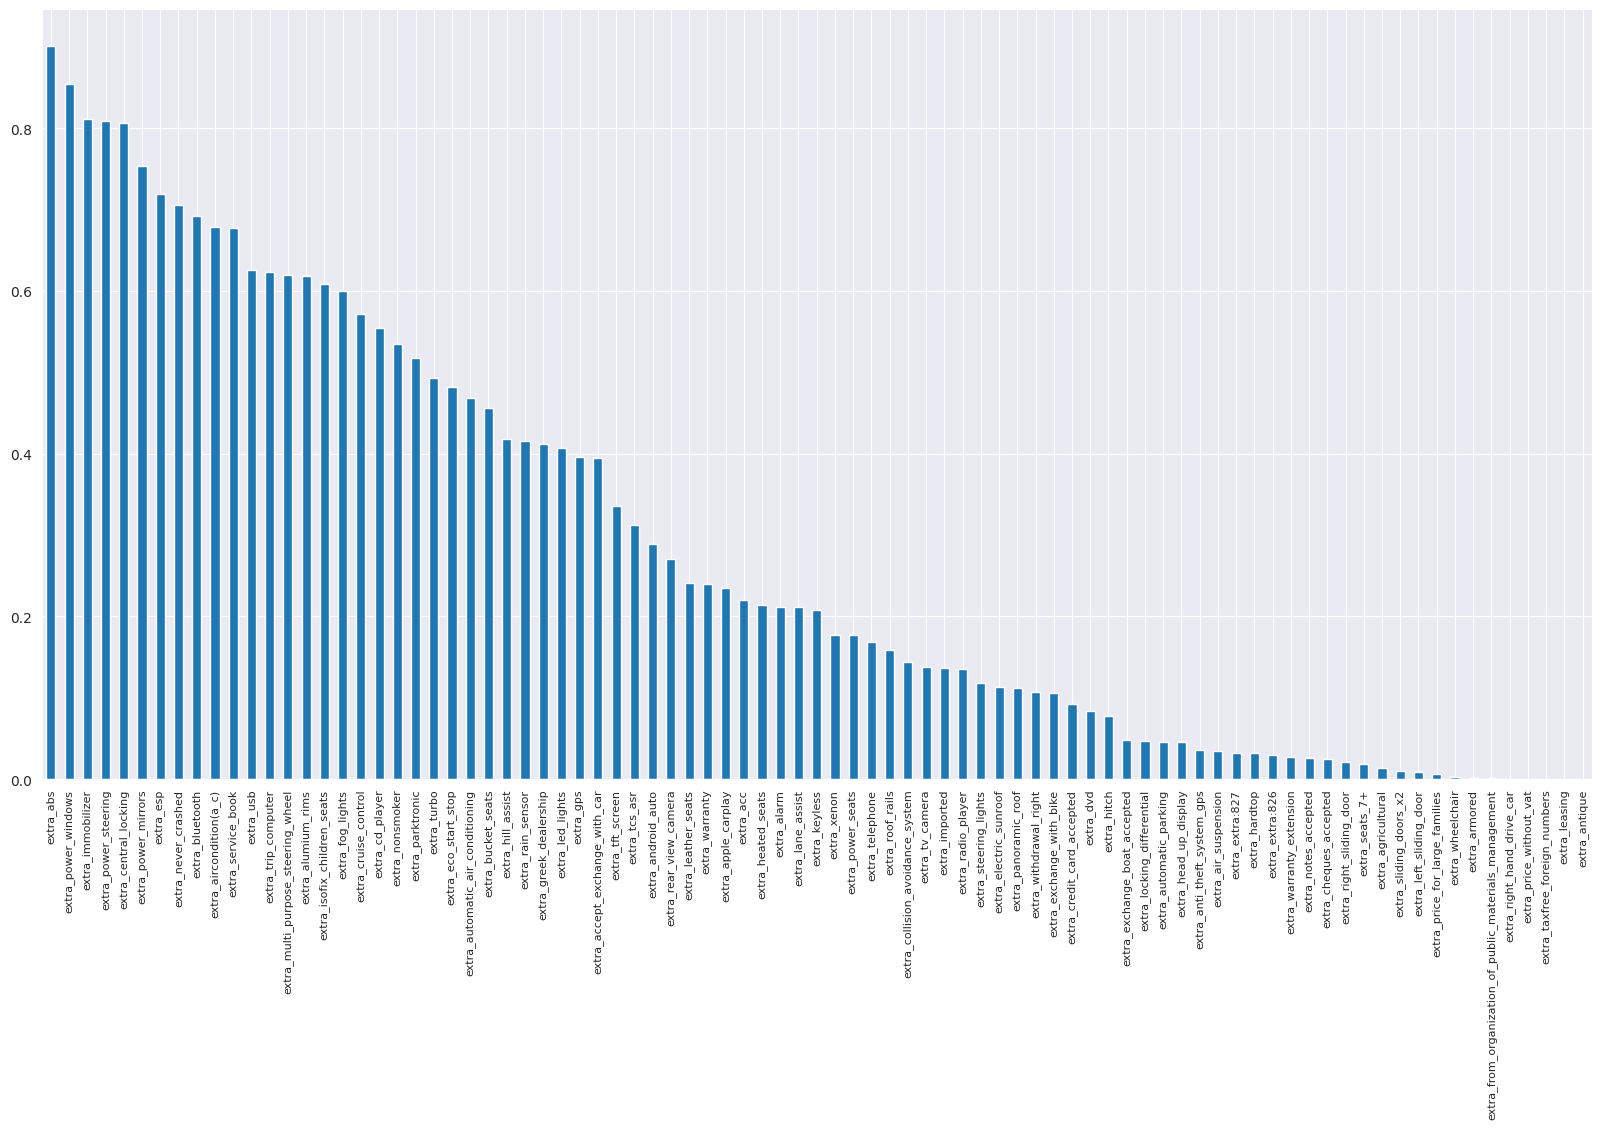

In [222]:
plt.figure(figsize = (20,10))
dataset.loc[:,dataset.columns.str.contains('extra')].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=8)

In [46]:
extra_cols = dataset.loc[:,dataset.columns.str.contains('extra')].columns.tolist()
extra_cols_price = extra_cols + ['raw_price']

In [48]:
df_extra = dataset.loc[:,extra_cols]

In [52]:
df_extra.mean().sort_values()

extra_taxfree_foreign_numbers                             0.000012
extra_price_without_vat                                   0.000195
extra_right_hand_drive_car                                0.000779
extra_from_organization_of_public_materials_management    0.000803
extra_armored                                             0.001132
                                                            ...   
extra_central_locking                                     0.806198
extra_power_steering                                      0.808754
extra_immobilizer                                         0.812185
extra_power_windows                                        0.85498
extra_abs                                                 0.901572
Length: 83, dtype: object

In [79]:
extras_low_cols = df_extra.columns[df_extra.mean(axis=0)<0.035].values.tolist()

In [80]:
melted_low_cols = pd.melt(frame=dataset.loc[:,extras_low_cols + ['raw_price']], id_vars=['raw_price'], value_vars=extras_low_cols)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'extra_cheques_accepted'),
  Text(1, 0, 'extra_wheelchair'),
  Text(2, 0, 'extra_extra:827'),
  Text(3, 0, 'extra_warranty_extension'),
  Text(4, 0, 'extra_from_organization_of_public_materials_management'),
  Text(5, 0, 'extra_seats_7+'),
  Text(6, 0, 'extra_hardtop'),
  Text(7, 0, 'extra_right_hand_drive_car'),
  Text(8, 0, 'extra_armored'),
  Text(9, 0, 'extra_left_sliding_door'),
  Text(10, 0, 'extra_agricultural'),
  Text(11, 0, 'extra_notes_accepted'),
  Text(12, 0, 'extra_price_without_vat'),
  Text(13, 0, 'extra_taxfree_foreign_numbers'),
  Text(14, 0, 'extra_sliding_doors_x2'),
  Text(15, 0, 'extra_price_for_large_families'),
  Text(16, 0, 'extra_extra:826'),
  Text(17, 0, 'extra_right_sliding_door')])

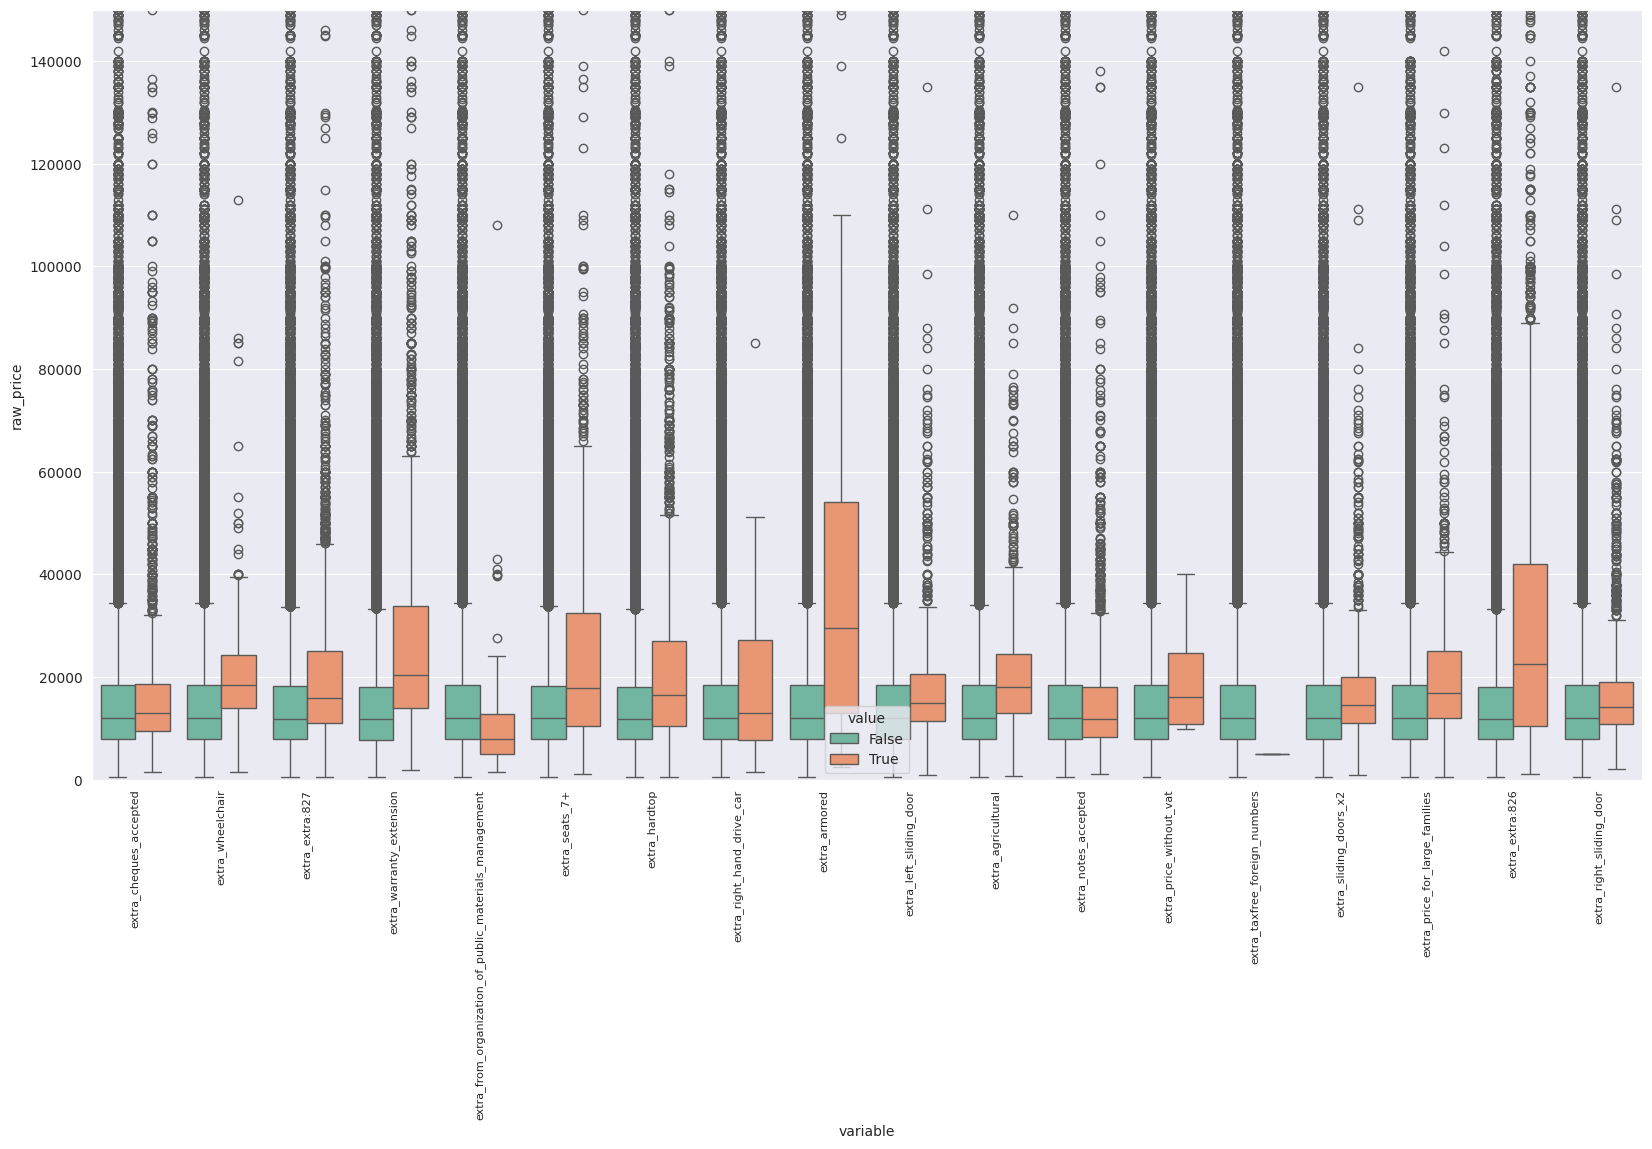

In [81]:
plt.figure(figsize = (20,10))
sns.boxplot(data=melted_low_cols[melted_low_cols.value.notna()],x='variable', y='raw_price', hue='value', palette='Set2')
plt.ylim([0,150000])
plt.xticks(fontsize=8,rotation=90)

In [82]:
# From these variables we see 2 extras which we don't knmow to what it corresponds (extra 827 or extra 826) so we will not consider them. Moreover extras related to the transaction will not be included (cheques accepted, cars with a price without vat will be dropped). Variable 7 seats and plus will be explicited in the column seats if we wish to use it so it is redundant. We will consider armored vehicle, warranty extension, and wheelchair. hardtop will be removed as correlated with the model of the car. left/right sliding doors will be removed. agricultural will be removed as correlated with the model of the car.

In [83]:
#So we wil drop these columns except for the ones we decided to keep

In [87]:
extras_low_cols= [x for x in  extras_low_cols if x not in ['extra_armored','extra_wheelchair','extra_warranty_extension']]

In [88]:
extras_low_cols

['extra_cheques_accepted',
 'extra_extra:827',
 'extra_from_organization_of_public_materials_management',
 'extra_seats_7+',
 'extra_hardtop',
 'extra_right_hand_drive_car',
 'extra_left_sliding_door',
 'extra_agricultural',
 'extra_notes_accepted',
 'extra_price_without_vat',
 'extra_taxfree_foreign_numbers',
 'extra_sliding_doors_x2',
 'extra_price_for_large_families',
 'extra_extra:826',
 'extra_right_sliding_door']

In [ ]:
dataset = dataset.drop(columns=extras_low_cols,inplace=False)

In [92]:
#Now let's look at very frequent options

In [95]:
frequent_extras = df_extra.columns[df_extra.mean(axis=0)>0.6].tolist()

In [96]:
frequent_extras

['extra_trip_computer',
 'extra_multi_purpose_steering_wheel',
 'extra_power_windows',
 'extra_aircondition(a_c)',
 'extra_alumium_rims',
 'extra_never_crashed',
 'extra_immobilizer',
 'extra_bluetooth',
 'extra_isofix_children_seats',
 'extra_abs',
 'extra_central_locking',
 'extra_service_book',
 'extra_power_mirrors',
 'extra_power_steering',
 'extra_usb',
 'extra_esp']

In [97]:
melted_frequent_extras = pd.melt(frame=dataset.loc[:,frequent_extras + ['raw_price']], id_vars=['raw_price'], value_vars=frequent_extras)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'extra_trip_computer'),
  Text(1, 0, 'extra_multi_purpose_steering_wheel'),
  Text(2, 0, 'extra_power_windows'),
  Text(3, 0, 'extra_aircondition(a_c)'),
  Text(4, 0, 'extra_alumium_rims'),
  Text(5, 0, 'extra_never_crashed'),
  Text(6, 0, 'extra_immobilizer'),
  Text(7, 0, 'extra_bluetooth'),
  Text(8, 0, 'extra_isofix_children_seats'),
  Text(9, 0, 'extra_abs'),
  Text(10, 0, 'extra_central_locking'),
  Text(11, 0, 'extra_service_book'),
  Text(12, 0, 'extra_power_mirrors'),
  Text(13, 0, 'extra_power_steering'),
  Text(14, 0, 'extra_usb'),
  Text(15, 0, 'extra_esp')])

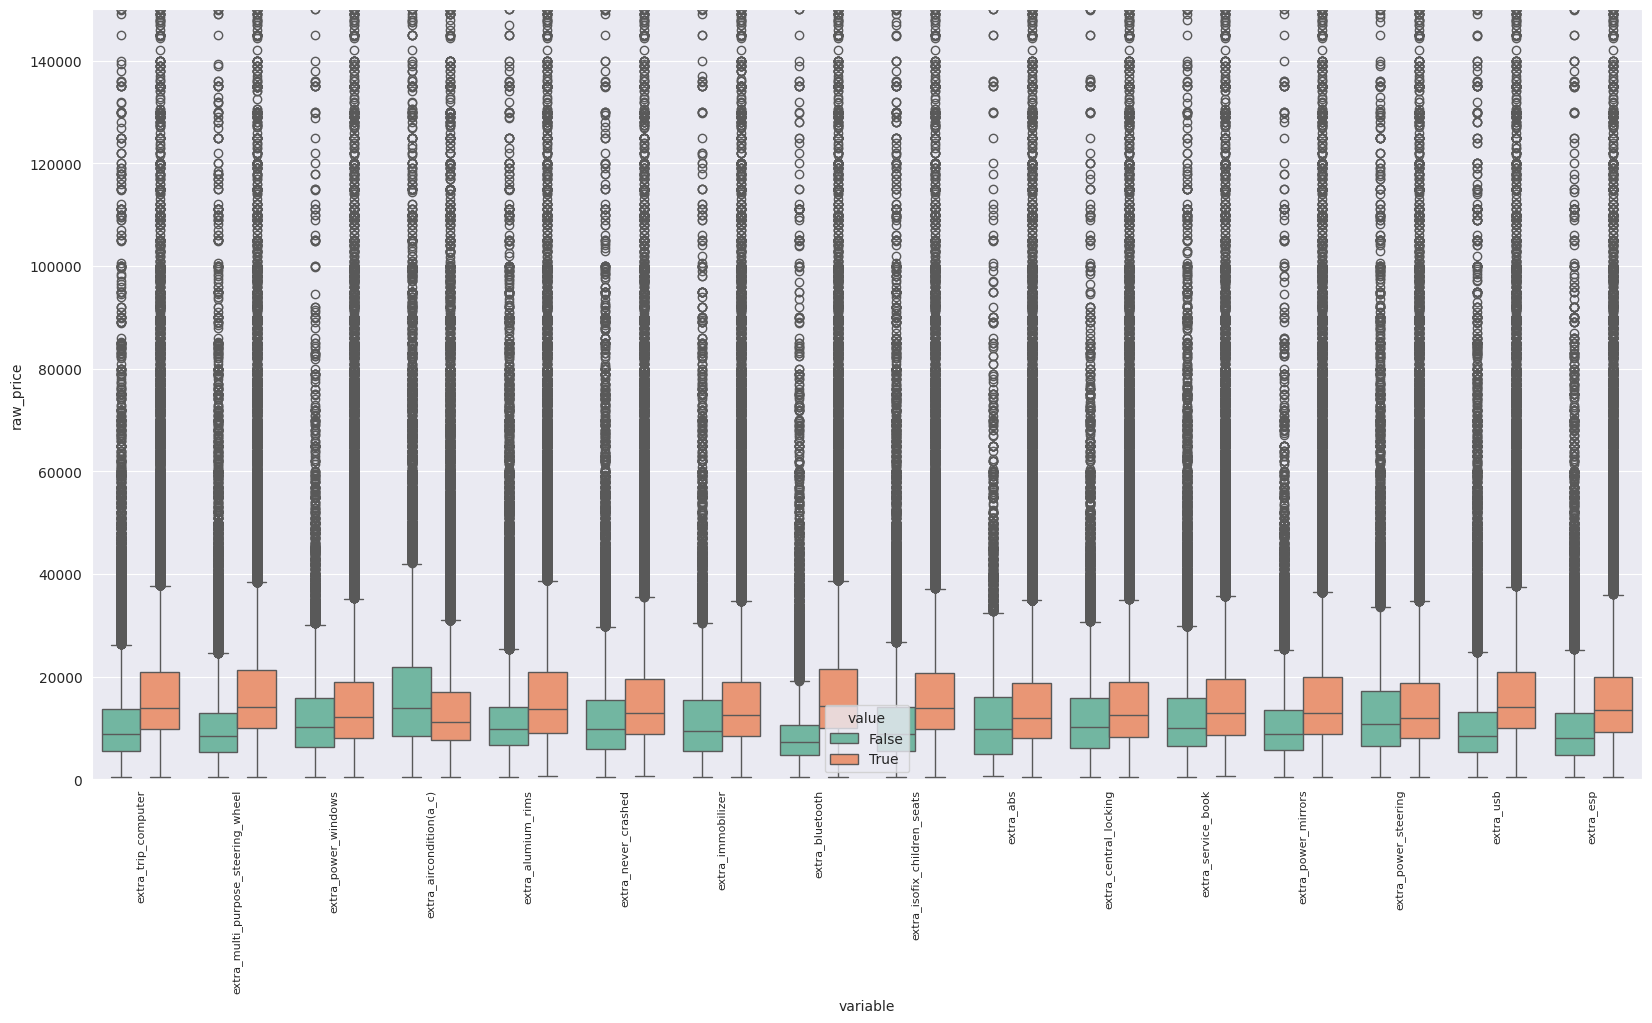

In [98]:
plt.figure(figsize = (20,10))
sns.boxplot(data=melted_frequent_extras[melted_frequent_extras.value.notna()],x='variable', y='raw_price', hue='value', palette='Set2')
plt.ylim([0,150000])
plt.xticks(fontsize=8,rotation=90)

In [99]:
df_extra.columns.tolist()

['extra_cheques_accepted',
 'extra_turbo',
 'extra_steering_lights',
 'extra_collision_avoidance_system',
 'extra_trip_computer',
 'extra_wheelchair',
 'extra_apple_carplay',
 'extra_credit_card_accepted',
 'extra_extra:827',
 'extra_leather_seats',
 'extra_anti_theft_system_gps',
 'extra_rain_sensor',
 'extra_panoramic_roof',
 'extra_dvd',
 'extra_automatic_parking',
 'extra_warranty_extension',
 'extra_from_organization_of_public_materials_management',
 'extra_multi_purpose_steering_wheel',
 'extra_tcs_asr',
 'extra_tv_camera',
 'extra_seats_7+',
 'extra_power_windows',
 'extra_bucket_seats',
 'extra_hitch',
 'extra_aircondition(a_c)',
 'extra_heated_seats',
 'extra_power_seats',
 'extra_alumium_rims',
 'extra_locking_differential',
 'extra_android_auto',
 'extra_accept_exchange_with_car',
 'extra_hardtop',
 'extra_right_hand_drive_car',
 'extra_roof_rails',
 'extra_armored',
 'extra_lane_assist',
 'extra_imported',
 'extra_left_sliding_door',
 'extra_agricultural',
 'extra_never_cra

In [101]:
remaining_cols = list(set(df_extra.columns.tolist()) - set(frequent_extras) - set(extras_low_cols))

In [102]:
remaining_cols

['extra_led_lights',
 'extra_roof_rails',
 'extra_bucket_seats',
 'extra_air_suspension',
 'extra_turbo',
 'extra_heated_seats',
 'extra_leather_seats',
 'extra_fog_lights',
 'extra_radio_player',
 'extra_keyless',
 'extra_greek_dealership',
 'extra_warranty',
 'extra_xenon',
 'extra_lane_assist',
 'extra_imported',
 'extra_rain_sensor',
 'extra_exchange_with_bike',
 'extra_locking_differential',
 'extra_credit_card_accepted',
 'extra_dvd',
 'extra_alarm',
 'extra_power_seats',
 'extra_android_auto',
 'extra_cruise_control',
 'extra_automatic_parking',
 'extra_anti_theft_system_gps',
 'extra_tv_camera',
 'extra_rear_view_camera',
 'extra_warranty_extension',
 'extra_eco_start_stop',
 'extra_acc',
 'extra_hill_assist',
 'extra_electric_sunroof',
 'extra_head_up_display',
 'extra_wheelchair',
 'extra_tft_screen',
 'extra_collision_avoidance_system',
 'extra_armored',
 'extra_nonsmoker',
 'extra_telephone',
 'extra_gps',
 'extra_steering_lights',
 'extra_cd_player',
 'extra_automatic_air_

In [106]:
# To remove:
to_drop = ['extra_greek_dealership',
'extra_imported',
'extra_exchange_with_bike',
'extra_credit_card_accepted',
'extra_acc',
'extra_nonsmoker',
'extra_withdrawal_right',
'extra_warranty',
'extra_accept_exchange_with_car',
'extra_exchange_boat_accepted']


In [107]:
dataset.drop(columns=to_drop,inplace=True)

In [110]:
dataset.columns.str.contains('extra').sum()

np.int64(58)

In [113]:
dataset.drop(columns=['extra_warranty_extension'],inplace=True)

In [114]:
# we dropped all extras related to the nature of the ad or of the transaction in order to only keep information about characteristics of the car

In [131]:
new_df_extra = dataset.loc[:,dataset.columns.str.contains('extra')].copy()

<Axes: >

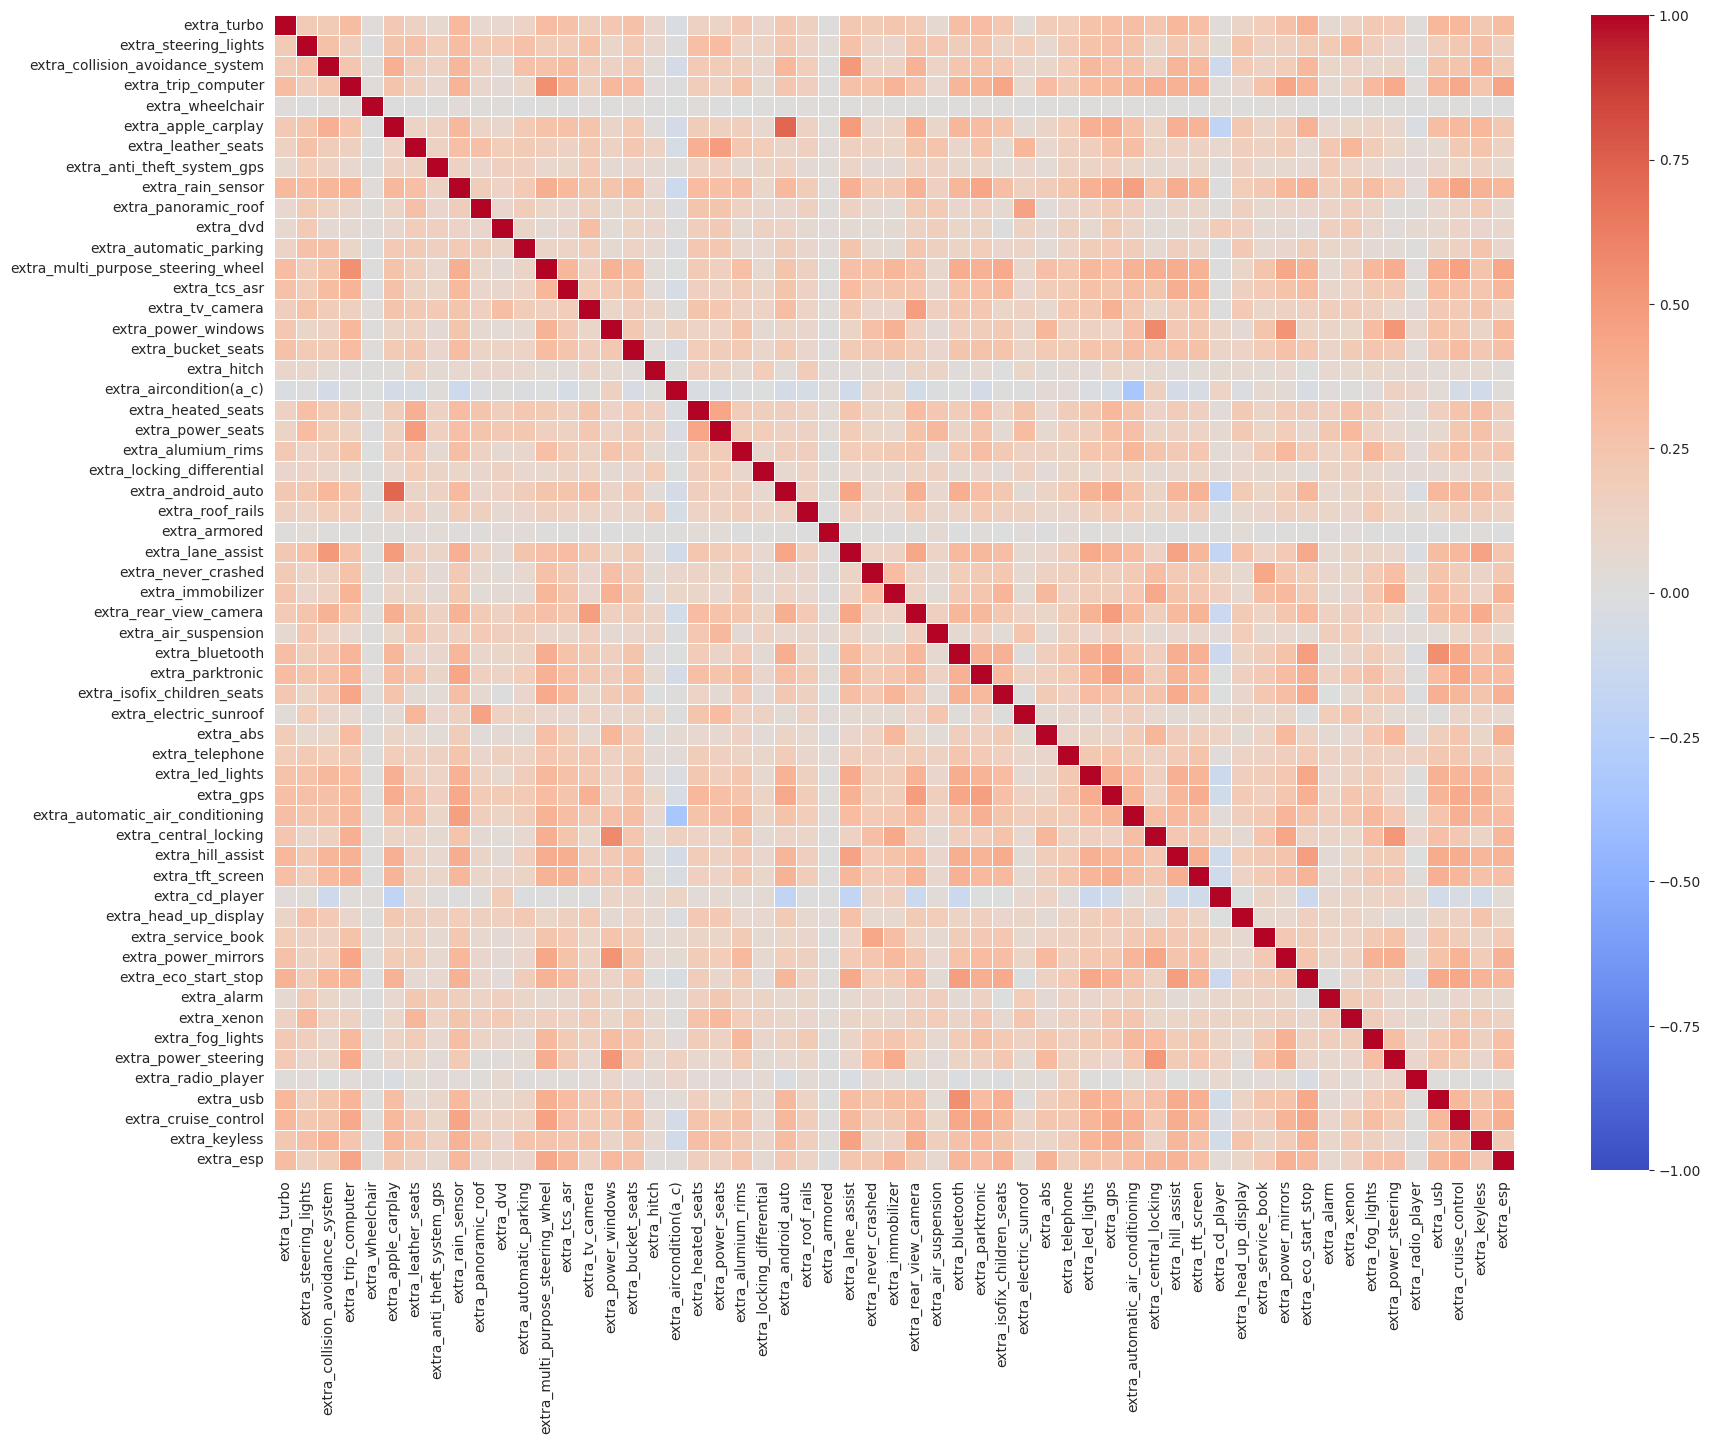

In [138]:
plt.figure(figsize = (20,15))
sns.heatmap(new_df_extra[new_df_extra.notna()].corr(),annot=False, cmap='coolwarm', vmin=-1, vmax=1,linewidths=0.5)

In [175]:
dataset = dataset.rename(columns={'extra_never_crashed':'never_crashed'})

In [245]:
# Comfort & Convenience
comfort = [
    'extra_power_seats',
    'extra_multi_purpose_steering_wheel',
    'extra_power_windows',
    'extra_bucket_seats',
    'extra_aircondition(a_c)',
    'extra_automatic_air_conditioning',
    'extra_power_mirrors',
    'extra_power_steering',
    'extra_roof_rails',
]

In [246]:
infotainment_connectivity = [
    'extra_apple_carplay',
    'extra_android_auto',
    'extra_bluetooth',
    'extra_usb',
    'extra_gps',
    'extra_tft_screen',
    'extra_cd_player',
    'extra_dvd',
    'extra_tv_camera',
    'extra_radio_player',
    'extra_telephone'
]

In [250]:
safety_driver_assistance = [
    'extra_collision_avoidance_system',
    'extra_automatic_parking',
    'extra_lane_assist',
    'extra_rear_view_camera',
    'extra_isofix_children_seats',
    'extra_immobilizer',
    'extra_anti_theft_system_gps',
    'extra_alarm',
    'extra_abs',
    'extra_esp',
    'extra_tcs_asr',
    'extra_hill_assist',
    'extra_parktronic',
    'extra_fog_lights',
    'extra_xenon',
    'extra_central_locking',
    'extra_keyless',
    'extra_cruise_control',
    'extra_power_steering'
]


In [251]:
performance_handling = [
    'extra_turbo',
    'extra_locking_differential',
    'extra_air_suspension',
    'extra_eco_start_stop',
    'extra_alumium_rims'
]

In [252]:
utility = [
    'extra_hitch',
    'extra_wheelchair',
    'extra_service_book',
]

In [253]:
premium_extras = [
    'extra_armored',
    'extra_head_up_display',
    'extra_air_suspension',
    'extra_panoramic_roof',
    'extra_electric_sunroof',
    'extra_leather_seats',
    'extra_led_lights',
    'extra_heated_seats',
    'extra_steering_lights',
    'extra_automatic_parking',
]

In [164]:
infotainment_connectivity

['extra_apple_carplay',
 'extra_android_auto',
 'extra_bluetooth',
 'extra_usb',
 'extra_gps',
 'extra_tft_screen',
 'extra_cd_player',
 'extra_dvd',
 'extra_tv_camera',
 'extra_radio_player',
 'extra_telephone']

In [151]:
# So now we have split the extras in 6 categories

<Axes: >

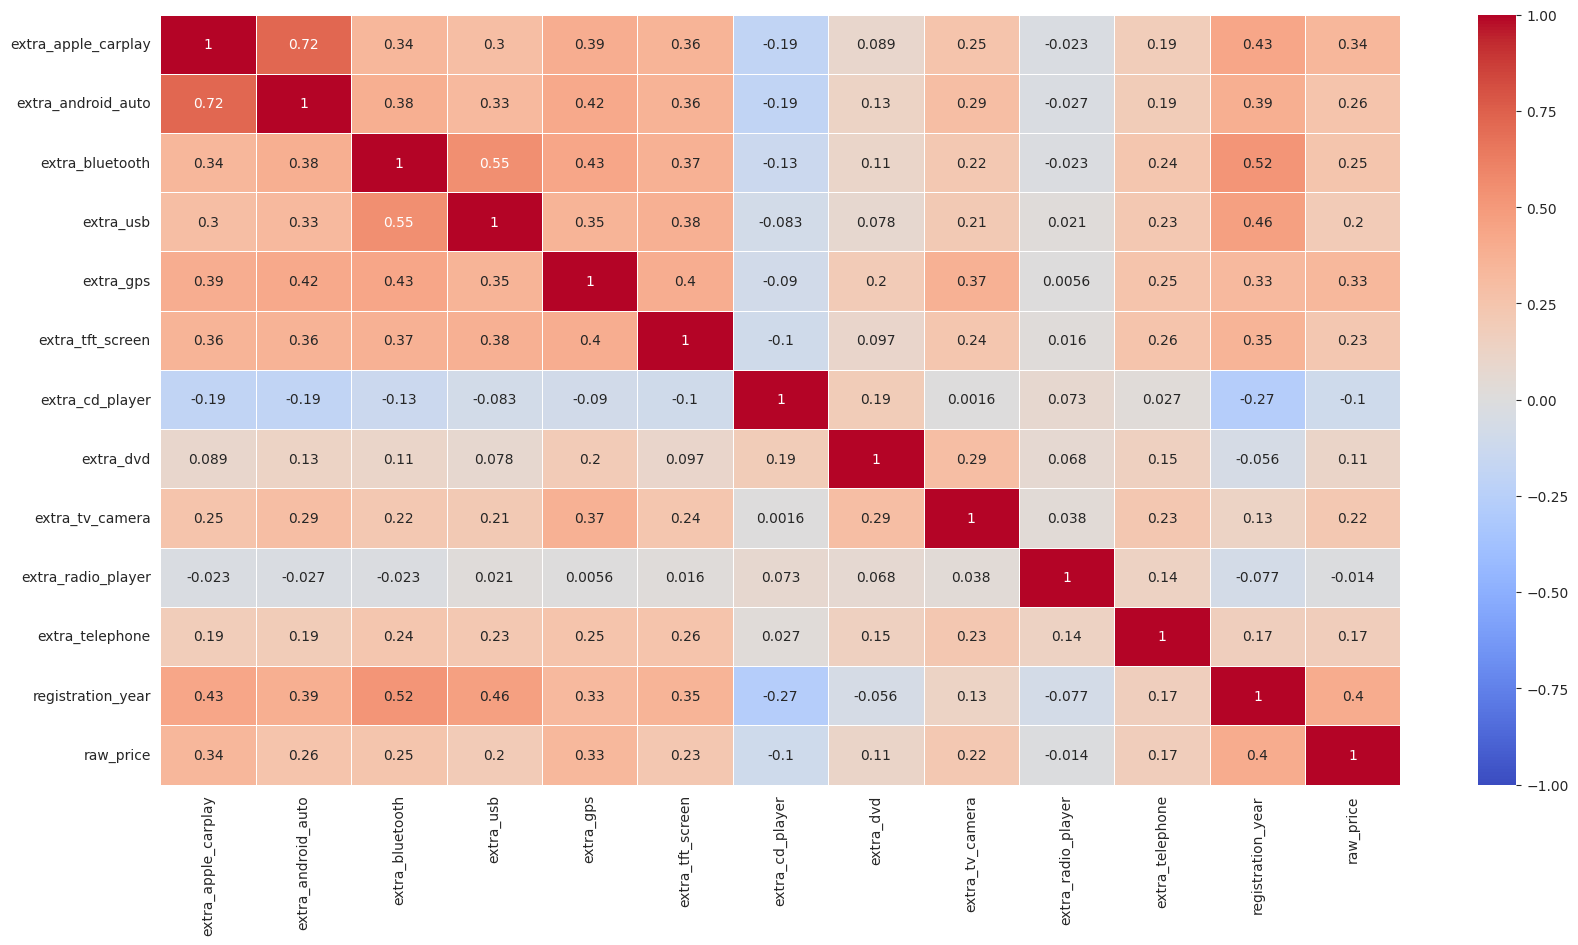

In [172]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , infotainment_connectivity + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [171]:
#We observe a negative correlation between the year and cd player while a positive one with apple car play. therefore when we will group into infotainment year will still be representative of the modernity of the equipment

<Axes: >

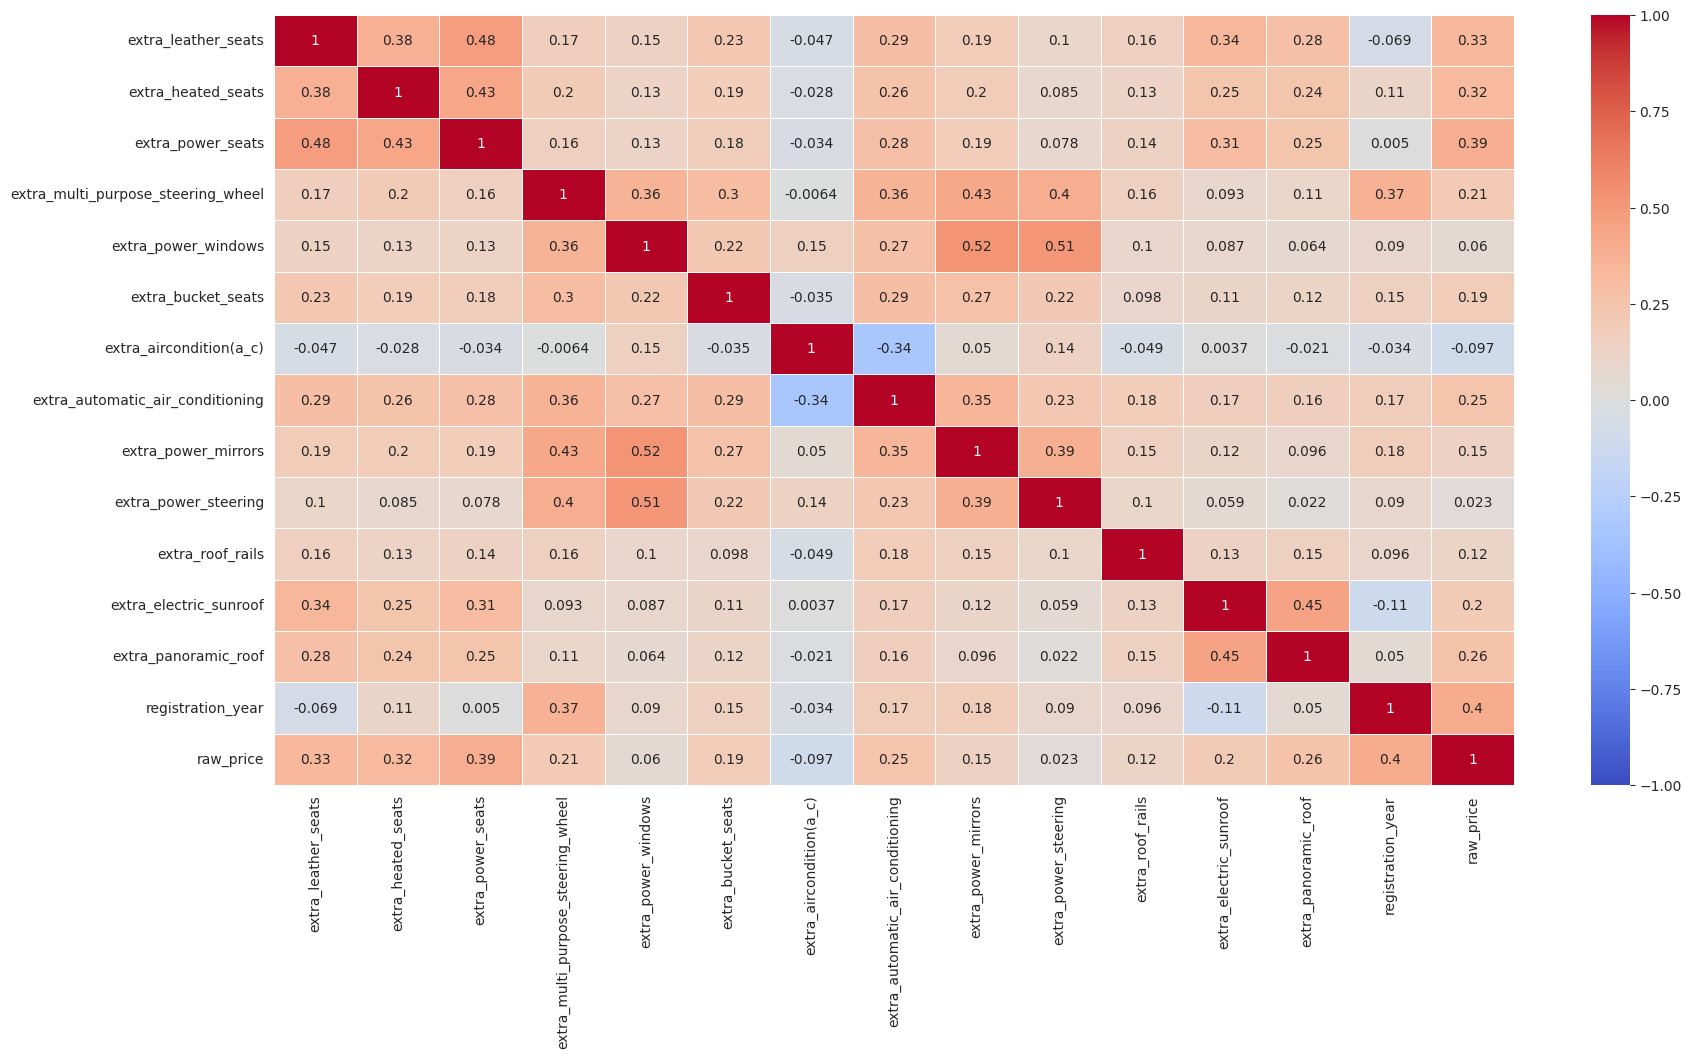

In [173]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , comfort + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

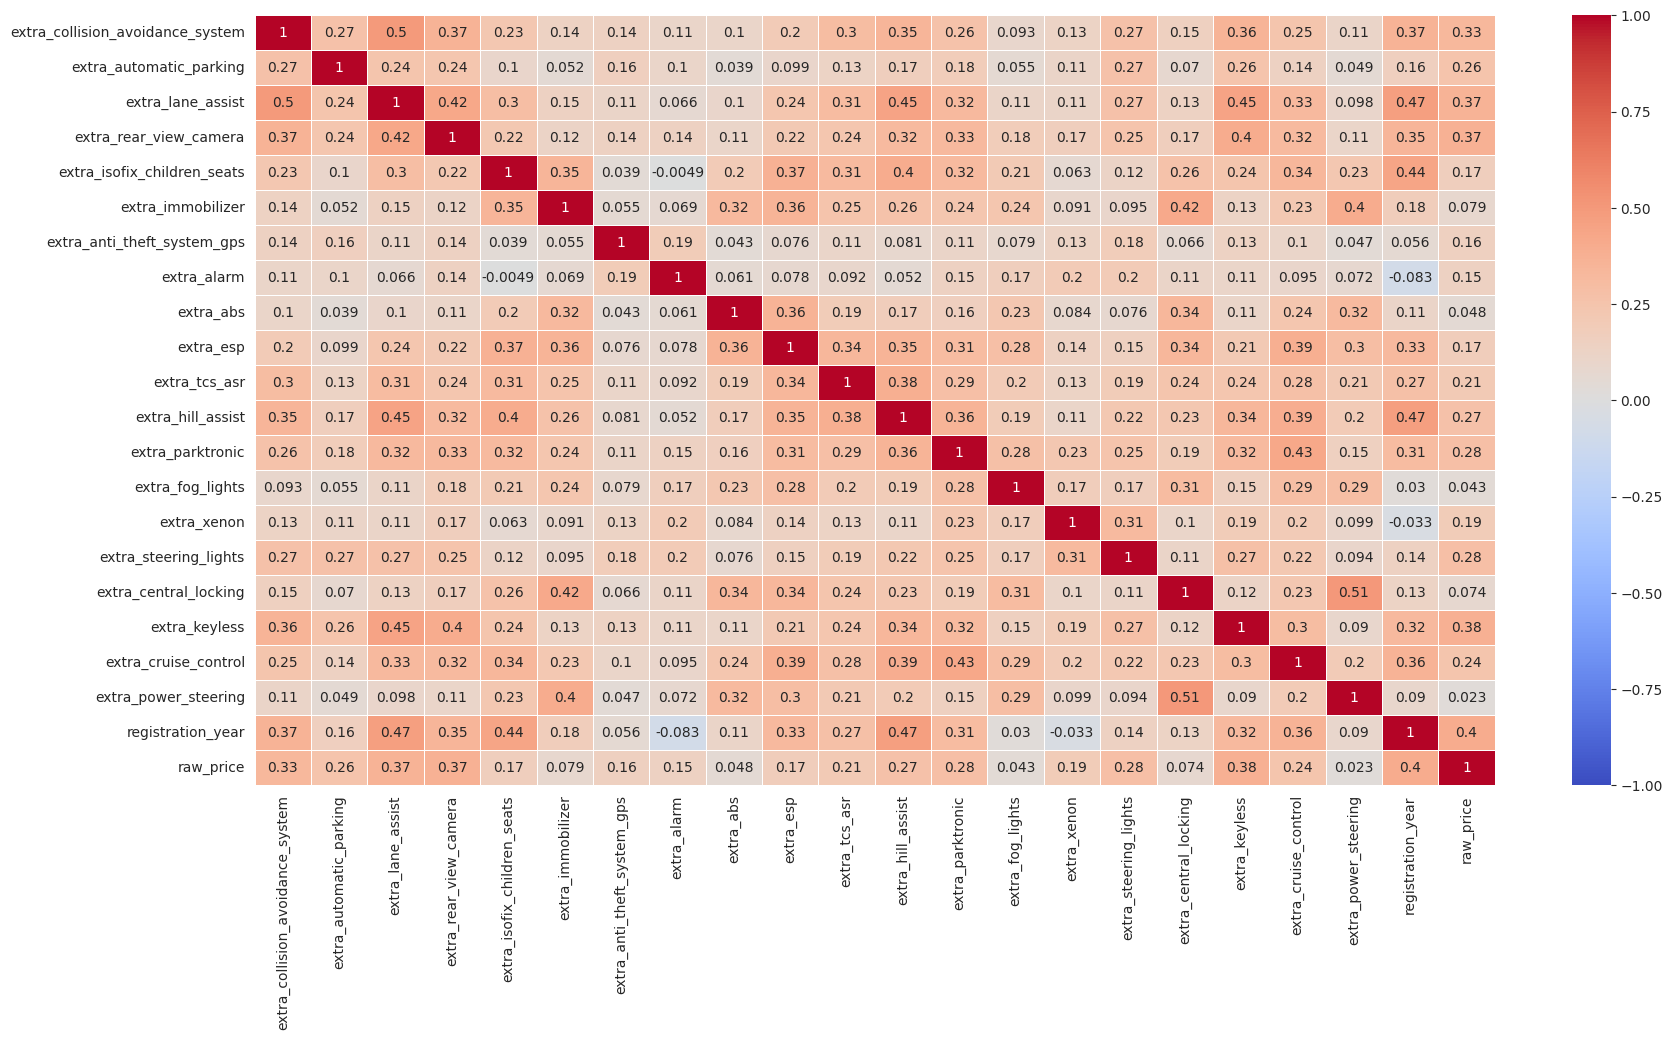

In [179]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , safety_driver_assistance + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [181]:
# We observe a high correlation between year and safety systems which is logical as new safety systems come out with time

<Axes: >

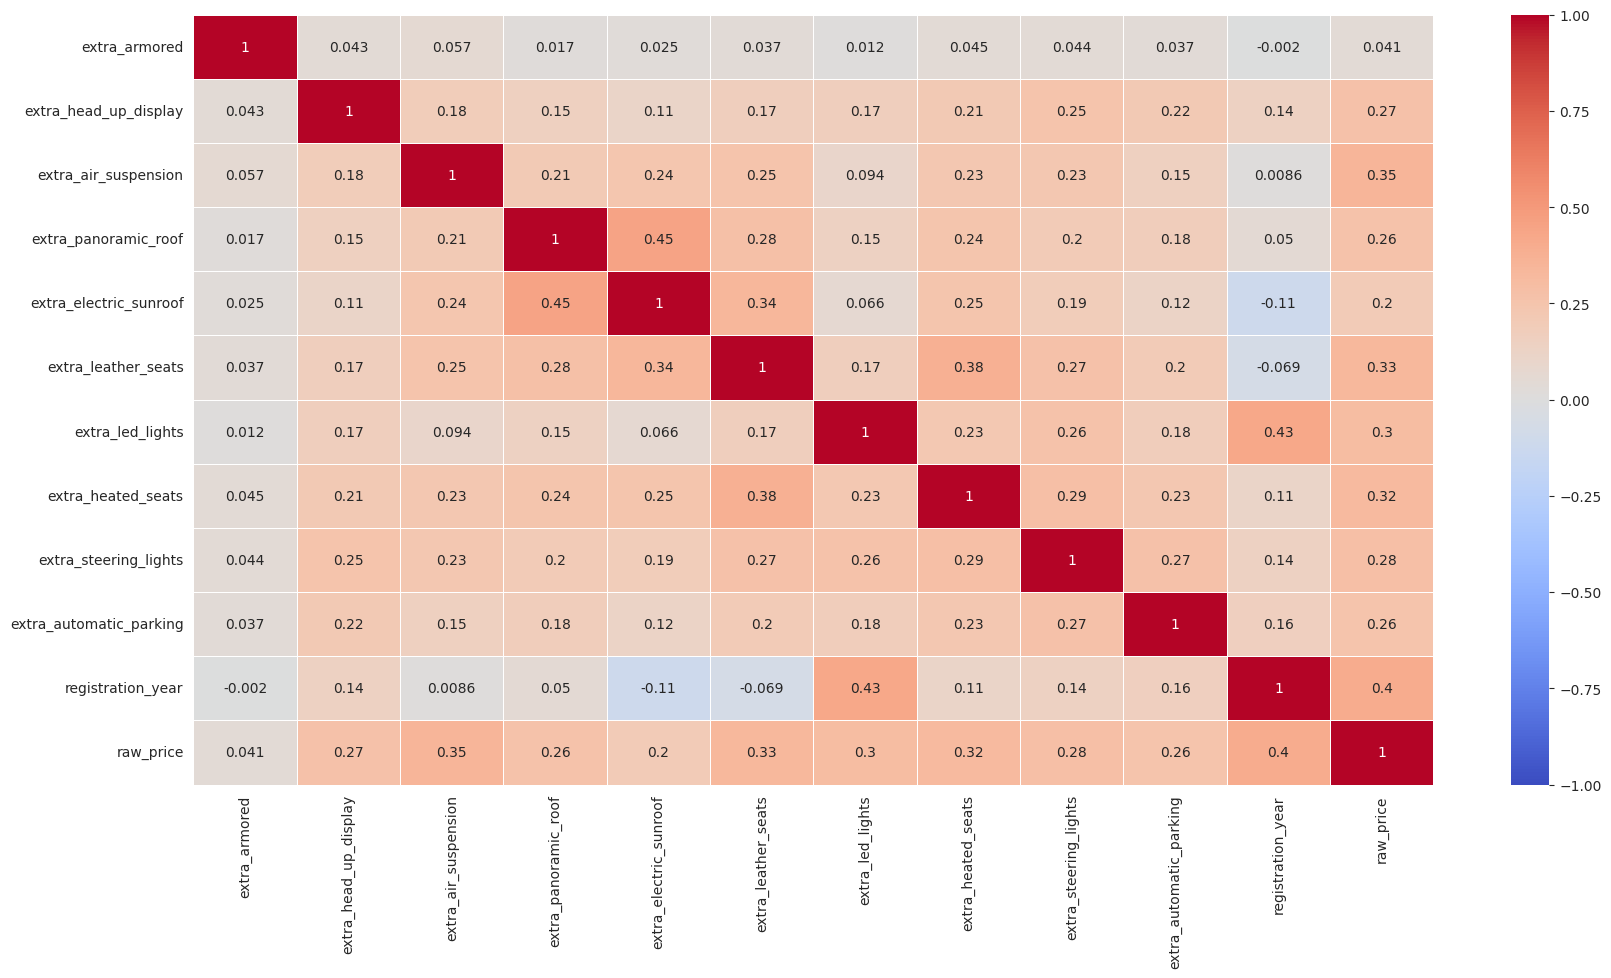

In [182]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , premium_extras + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

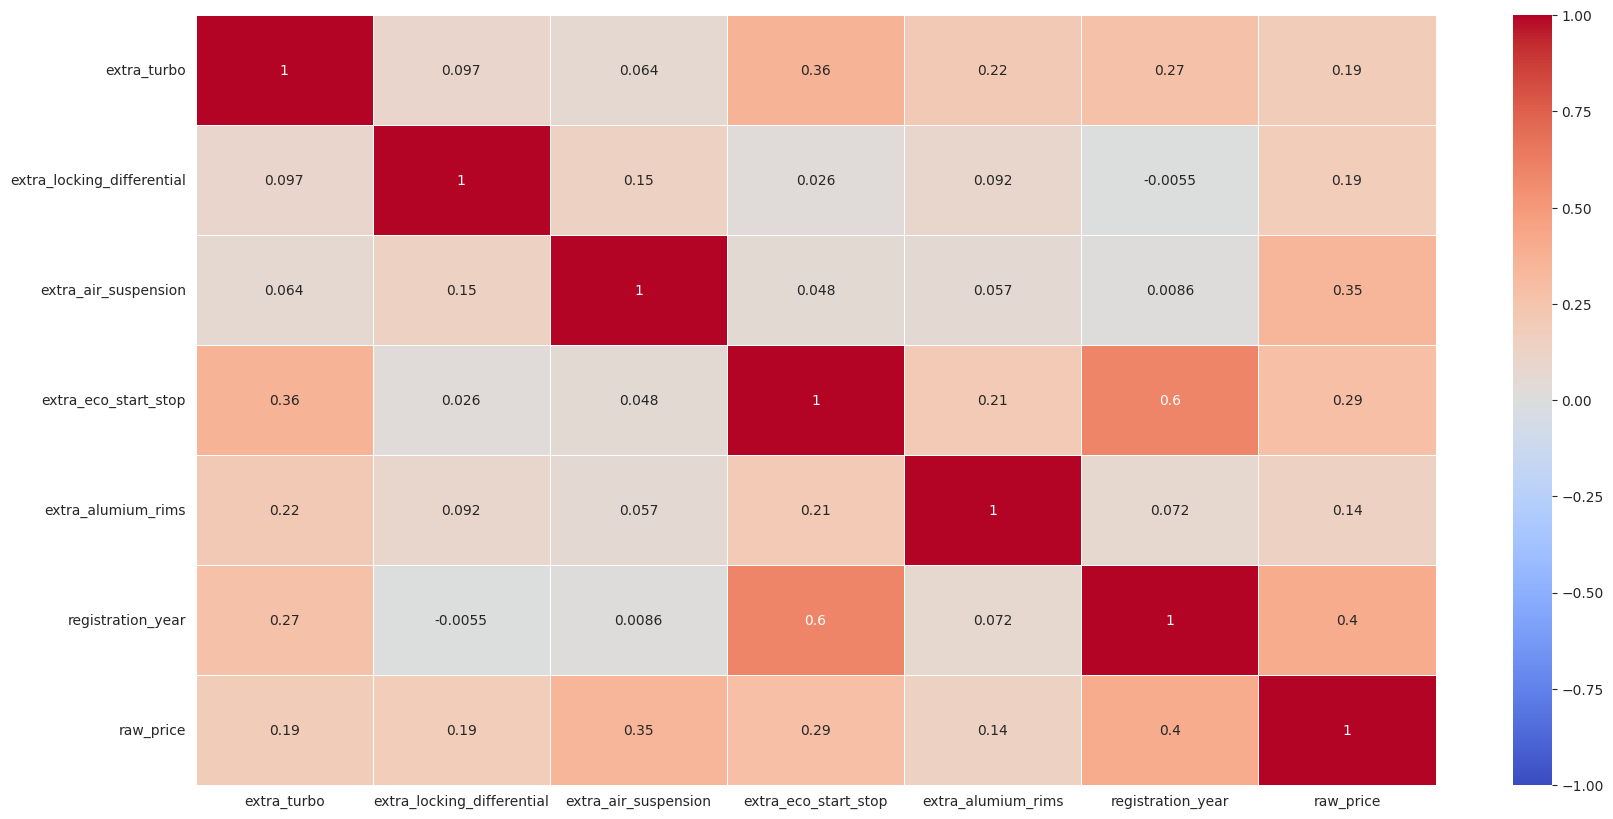

In [183]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , performance_handling + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

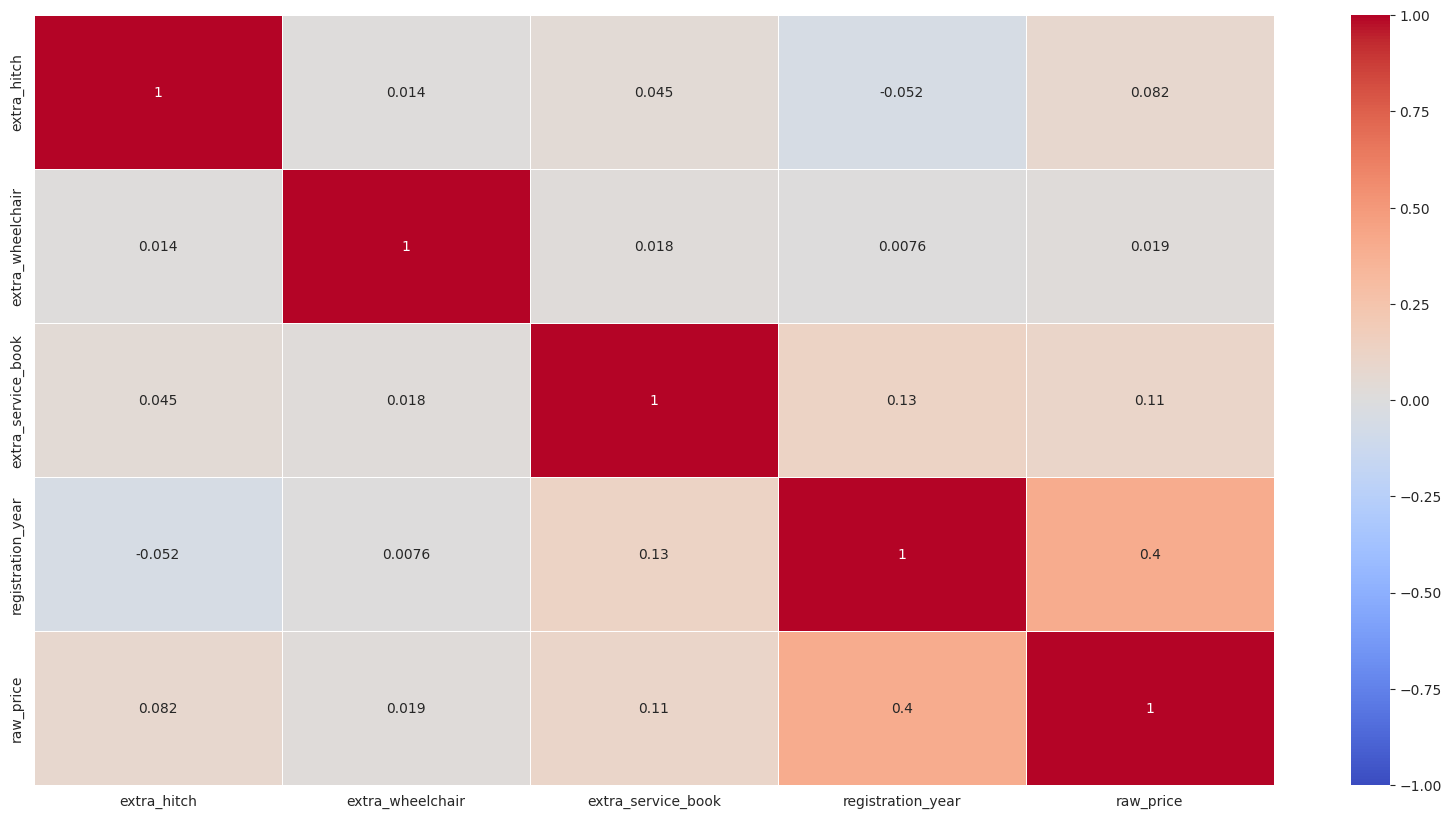

In [186]:
plt.figure(figsize = (20,10))
sns.heatmap(data=dataset.loc[dataset.extra_usb.notna() , utility + ['registration_year','raw_price']].corr(), linewidths=0.5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [254]:
dict_options = {'comfort_options': comfort, 'safety_driver_assistance_options': safety_driver_assistance, 'performance_handling_options': performance_handling, 'utility_options': utility, 'premium_options': premium_extras, 'infotainment_options': infotainment_connectivity}

In [255]:
def sum_over_extras(row):
    if row.isna().any():
        return np.nan
    else:
        return row.sum()/len(row)

In [256]:
for options in dict_options:
    dataset[options] = dataset.loc[:,dict_options[options]].apply(lambda x: sum_over_extras(x),axis=1)

In [257]:
pd.options.display.float_format = '{:.2f}'.format

dataset.head()

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,fuel_consumption,drive_type,doors,is_metallic,comfort_options,safety_driver_assistance_options,performance_handling_options,utility_options,premium_options,infotainment_options
0,40.54,22.99,fb208079-b3a1-4187-abe1-c3532386445c,False,NaN,Kia Sportage '02 LIMIDET DERMA FULL EXTRA,"{'count': 7, 'urls': ['https://static.car.gr/1...",11709,True,3027523,...,NaN,4WD,2.00,True,0.56,0.26,0.40,0.67,0.20,0.09
1,41.09,23.57,b8976804-d099-490e-bbcb-d3a9b0971253,False,NaN,Porsche Boxster '02 TIPTRONIC,"{'count': 8, 'urls': ['https://static.car.gr/6...",69173,True,1002754,...,NaN,RWD,3.00,True,0.67,0.42,0.20,0.33,0.30,0.18
2,40.61,22.13,80a45785-5712-40c1-9f93-97d02346e8b3,False,NaN,Volkswagen Beetle '03 20V 1.8 TURBO!!!,"{'count': 12, 'urls': ['https://static.car.gr/...",120378,True,1000729,...,8.1,FWD,3.00,True,0.56,0.32,0.40,0.33,0.20,0.27
3,38.94,22.87,8d8ae694-5a18-40ec-8fbd-94369684db9d,False,NaN,Audi A6 '05 3.0TDI,"{'count': 5, 'urls': ['https://static.car.gr/1...",147645,True,3027099,...,7.9,4WD,5.00,True,0.89,0.53,0.40,0.67,0.40,0.36
4,37.62,22.76,237d7aa1-bf02-492f-a49a-53a232833348,False,NaN,Jeep Cherokee '03,"{'count': 7, 'urls': ['https://static.car.gr/2...",248955,True,1006024,...,NaN,4WD,5.00,True,0.44,0.37,0.40,0.67,0.10,0.27


<Axes: >

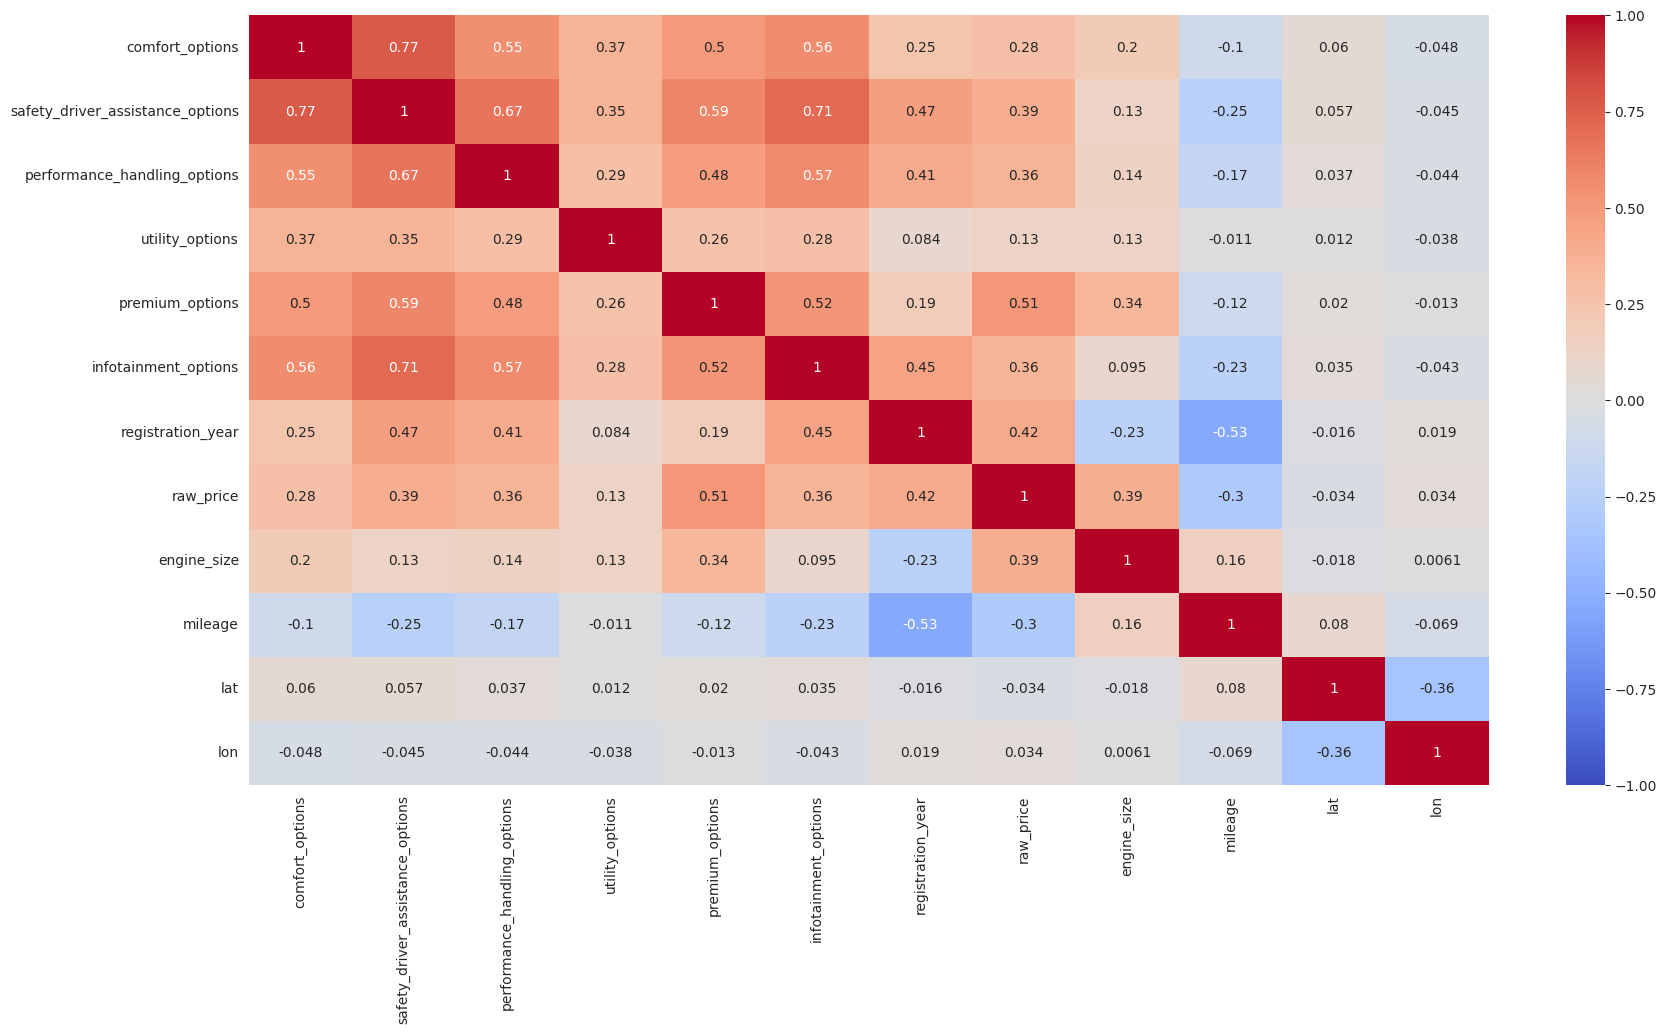

In [264]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.loc[:,[x for x in dataset.columns if 'options' in x] + ['registration_year','raw_price','engine_size','mileage','lat','lon']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Figure size 2000x1000 with 0 Axes>

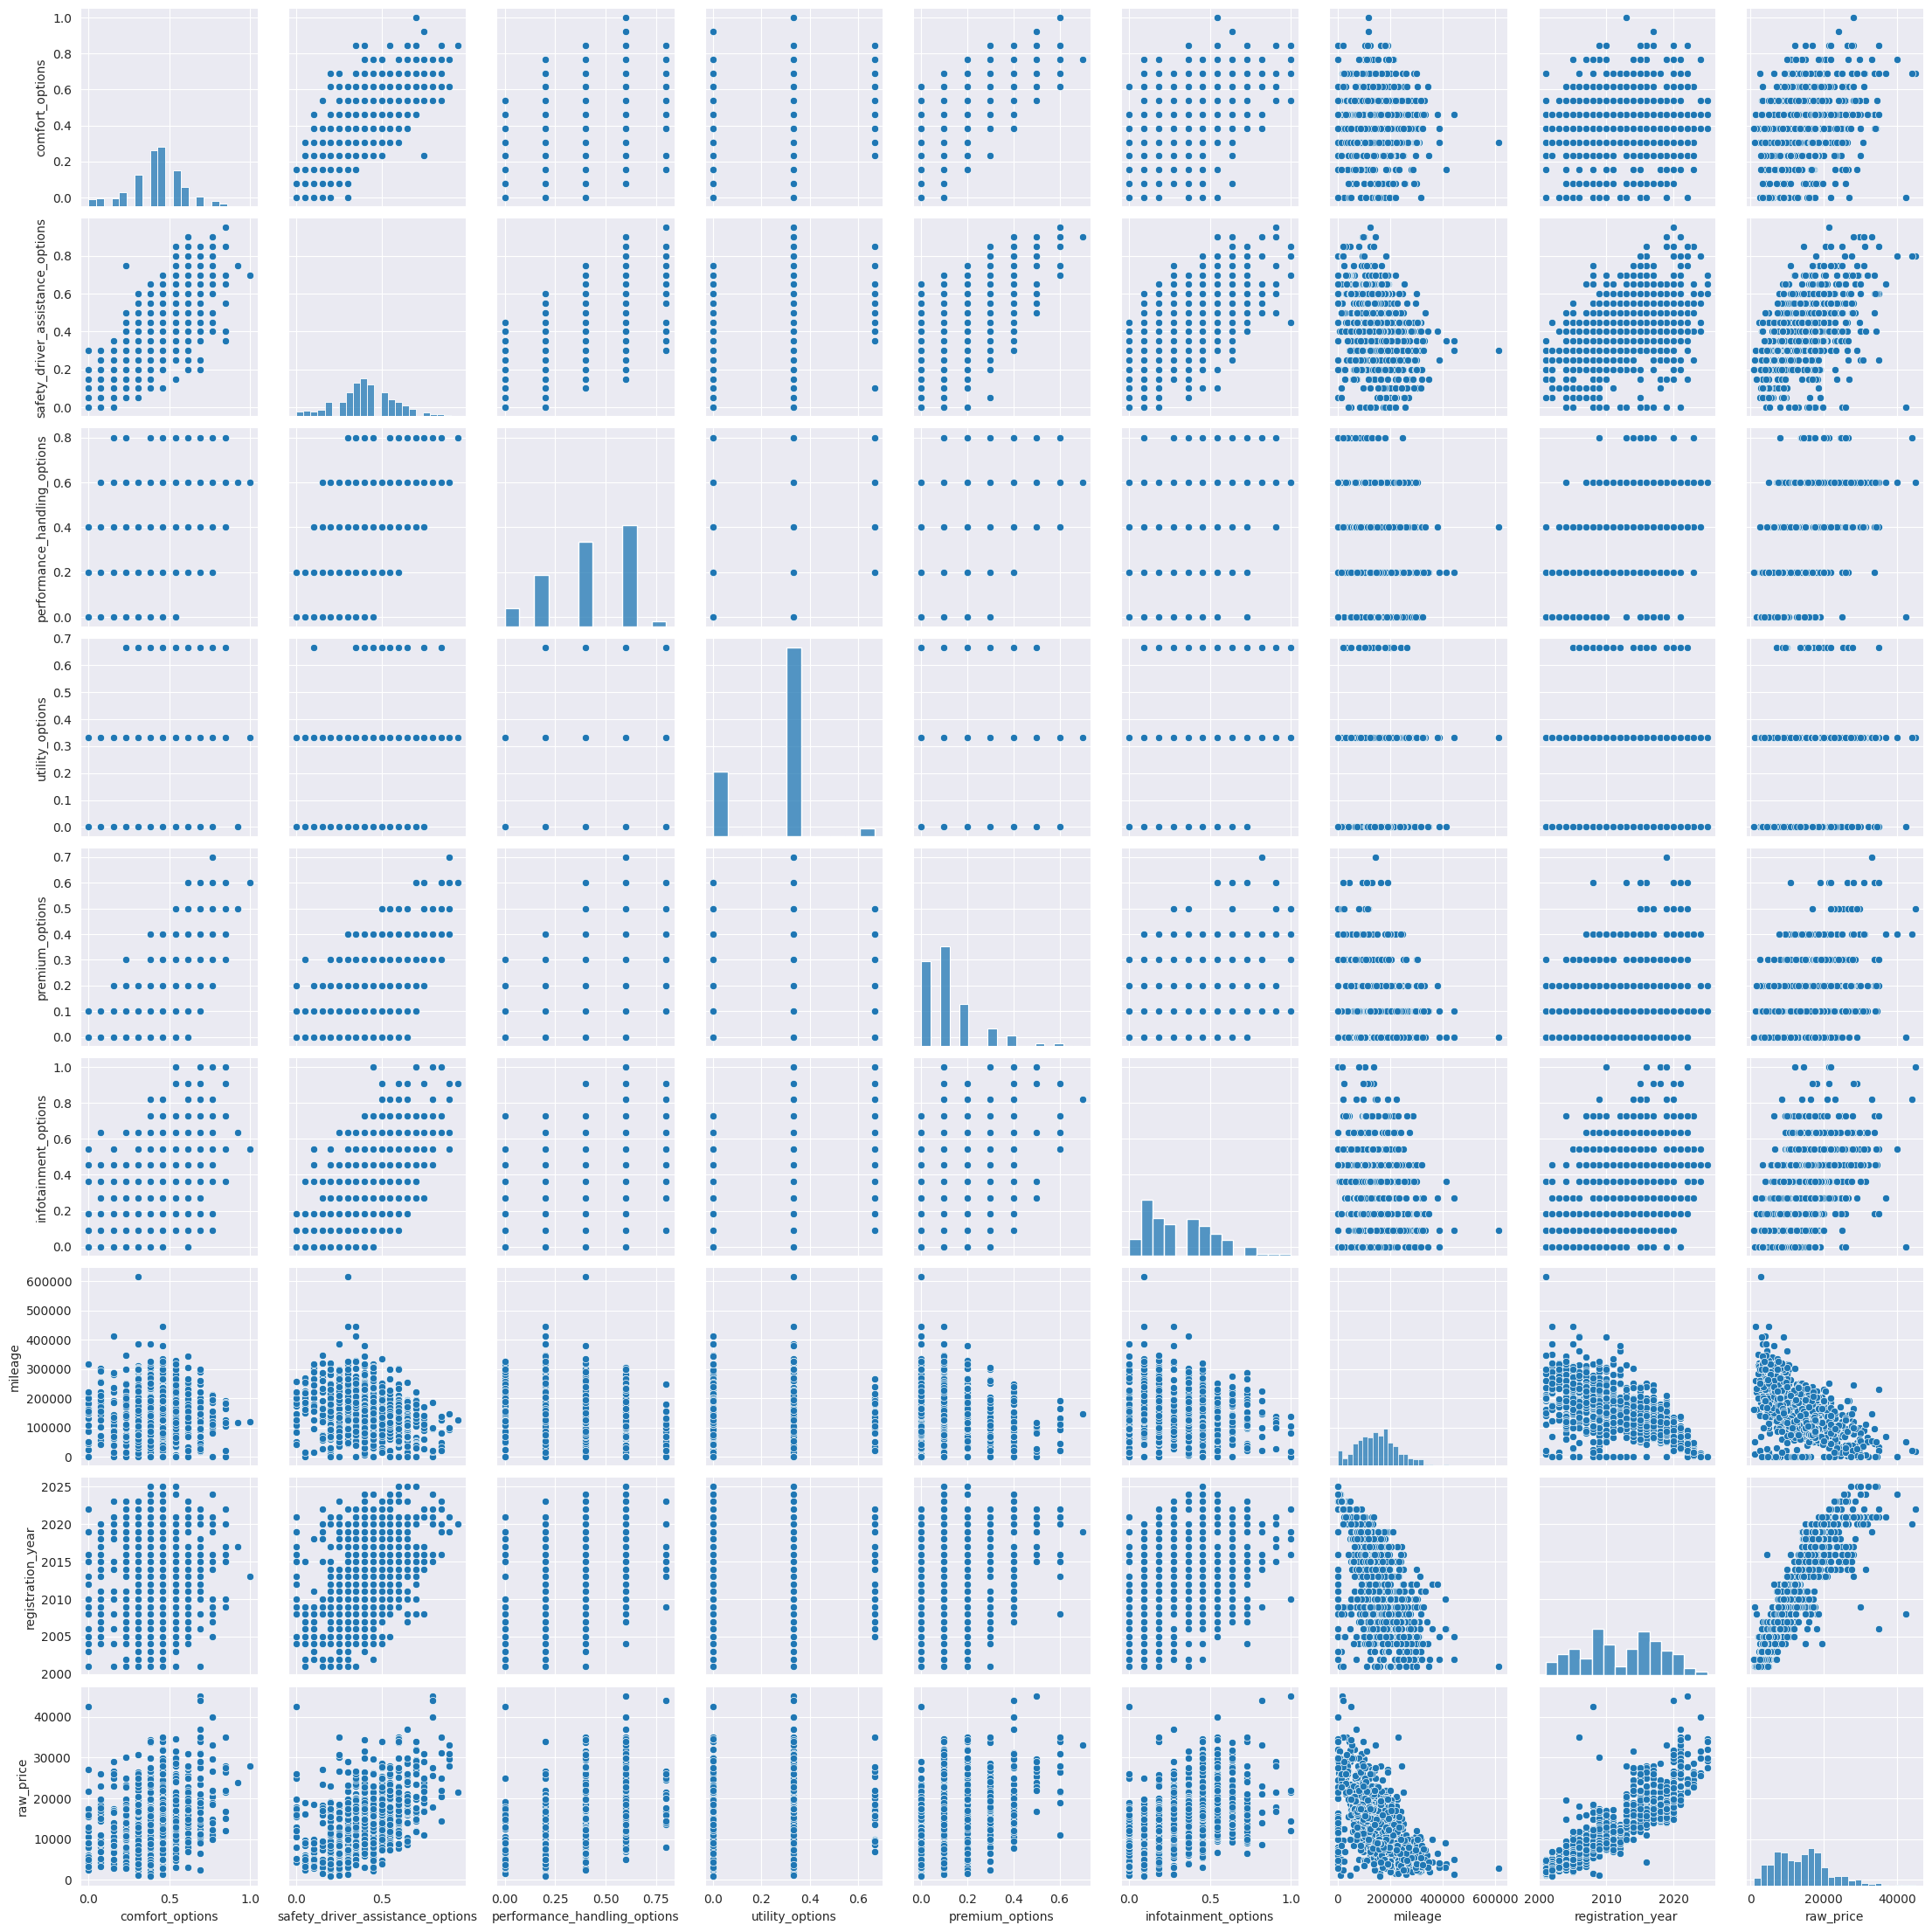

In [243]:
plt.figure(figsize = (20,10))
sns.pairplot(dataset.loc[(dataset.brand=='audi')&(dataset.model=='a3'),[x for x in dataset.columns if 'options' in x] +['mileage','registration_year','raw_price']])

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,fuel_consumption,drive_type,doors,is_metallic,comfort_options,safety_driver_assistance_options,performance_handling_options,utility_options,premium_options,infotainment_options
0,40.54,22.99,fb208079-b3a1-4187-abe1-c3532386445c,False,NaN,Kia Sportage '02 LIMIDET DERMA FULL EXTRA,"{'count': 7, 'urls': ['https://static.car.gr/1...",11709,True,3027523,...,NaN,4WD,2.00,True,0.56,0.26,0.40,0.67,0.20,0.09
1,41.09,23.57,b8976804-d099-490e-bbcb-d3a9b0971253,False,NaN,Porsche Boxster '02 TIPTRONIC,"{'count': 8, 'urls': ['https://static.car.gr/6...",69173,True,1002754,...,NaN,RWD,3.00,True,0.67,0.42,0.20,0.33,0.30,0.18
2,40.61,22.13,80a45785-5712-40c1-9f93-97d02346e8b3,False,NaN,Volkswagen Beetle '03 20V 1.8 TURBO!!!,"{'count': 12, 'urls': ['https://static.car.gr/...",120378,True,1000729,...,8.1,FWD,3.00,True,0.56,0.32,0.40,0.33,0.20,0.27
3,38.94,22.87,8d8ae694-5a18-40ec-8fbd-94369684db9d,False,NaN,Audi A6 '05 3.0TDI,"{'count': 5, 'urls': ['https://static.car.gr/1...",147645,True,3027099,...,7.9,4WD,5.00,True,0.89,0.53,0.40,0.67,0.40,0.36
4,37.62,22.76,237d7aa1-bf02-492f-a49a-53a232833348,False,NaN,Jeep Cherokee '03,"{'count': 7, 'urls': ['https://static.car.gr/2...",248955,True,1006024,...,NaN,4WD,5.00,True,0.44,0.37,0.40,0.67,0.10,0.27


In [270]:
dataset[(dataset.interior_type=='leather')&(dataset.extra_leather_seats==False)]

,lat,lon,uuid,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,fuel_consumption,drive_type,doors,is_metallic,comfort_options,safety_driver_assistance_options,performance_handling_options,utility_options,premium_options,infotainment_options
348,40.54,22.21,8b134098-cd51-4bbc-8eb0-348b3c691539,False,NaN,Bmw 320 '10 COUPE E92 Eλληνικο 1ο χερι... προσ...,"{'count': 16, 'urls': ['https://static.car.gr/...",10065969,True,1007325,...,NaN,RWD,2.00,True,0.67,0.47,0.40,0.33,0.10,0.09
429,37.89,23.73,8c695667-321b-4fd3-a495-b9216050ab98,False,NaN,Kia Sportage '05,"{'count': 4, 'urls': ['https://static.car.gr/1...",11175810,True,60767,...,8.0,FWD,5.00,False,0.11,0.21,0.00,0.00,0.00,0.09
455,38.01,23.78,8d3f5e0a-b599-4277-8d24-11f65ac71deb,False,NaN,Bentley Continental '07,"{'count': 12, 'urls': ['https://static.car.gr/...",11862056,False,1011538,...,NaN,4WD,2.00,True,0.00,0.00,0.00,0.33,0.00,0.00
459,38.01,23.85,d4351b89-e7ed-4dbb-81f9-3d5a2205300d,False,NaN,Jaguar S-Type '03 COPA CAR,"{'count': 29, 'urls': ['https://static.car.gr/...",11964774,True,1011509,...,NaN,RWD,4.00,True,0.56,0.42,0.20,0.00,0.00,0.09
596,37.87,23.75,edfc48e8-0750-4c39-a87a-67907c6c8de0,False,NaN,Jeep Cherokee '05 CHEROKEE 3.7 LIMITED,"{'count': 8, 'urls': ['https://static.car.gr/1...",14102556,True,102331,...,13,NaN,5.00,True,0.00,0.11,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100921,37.84,23.77,aa040923-b2f6-4152-8599-20bd7c2592e5,False,NaN,Lexus RX450 '17 Executive Sunroof Auto /6 Χρόν...,"{'count': 84, 'urls': ['https://static.car.gr/...",345619415,False,1000899,...,"3,40",4WD,5.00,False,0.22,0.26,0.40,0.33,0.20,0.36
101058,37.97,23.61,8bbe1c48-2111-4d6d-bbee-2a7d215b73a2,False,NaN,Fiat Doblo '18 5ΘΕΣΙΟ!!,"{'count': 19, 'urls': ['https://static.car.gr/...",346105941,False,3026774,...,NaN,NaN,6.00,False,0.56,0.42,0.00,0.33,0.00,0.45
101143,38.01,23.65,4e6d9cd3-fd98-462f-9a11-32aeded97d18,True,new,DFSK Fengon 500 '25 Premium Βενζίνη,"{'count': 32, 'urls': ['https://static.car.gr/...",346332579,False,1004931,...,NaN,FWD,5.00,False,0.56,0.58,0.20,0.33,0.10,0.36
101352,39.38,22.88,3141d3ea-5953-4b8a-a6ab-d38c1ec5a71a,False,NaN,Mini Countryman '17 Cooper 1.5i Steptronic,"{'count': 12, 'urls': ['https://static.car.gr/...",346813981,True,1001437,...,NaN,FWD,5.00,False,0.56,0.53,0.60,0.33,0.10,0.09


In [271]:
dataset.loc[:,~(dataset.columns.str.contains('extra'))].isna().sum()

lat                                     0
lon                                     0
uuid                                    0
is_new                                  0
label                               99682
                                    ...  
safety_driver_assistance_options    19261
performance_handling_options        19261
utility_options                     19261
premium_options                     19261
infotainment_options                19261
Length: 63, dtype: int64

In [272]:
dataset = dataset[(dataset.is_metallic.notna())&
                  (dataset.doors.notna())&
                  (dataset.seats.notna())
                    ].copy().reset_index(drop=True)

In [274]:
dataset.to_pickle('../data/processing_after_eda_02032024.pkl')

In [277]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)

In [279]:
train.to_pickle('../data/train_02032024.pkl')
test.to_pickle('../data/test_02032024.pkl')

In [281]:
dataset.modified.max()

'2025-02-15 01:01:39'

In [282]:
dataset.modified.min()

'2018-07-05 16:21:55'

In [349]:
dataset['ad_year'] = pd.to_datetime(dataset.modified).dt.year

In [351]:
dataset.ad_year.value_counts()

ad_year
2025    98540
2024     2798
2023       64
2022       19
2021        5
2018        1
Name: count, dtype: int64

<Axes: xlabel='ad_year'>

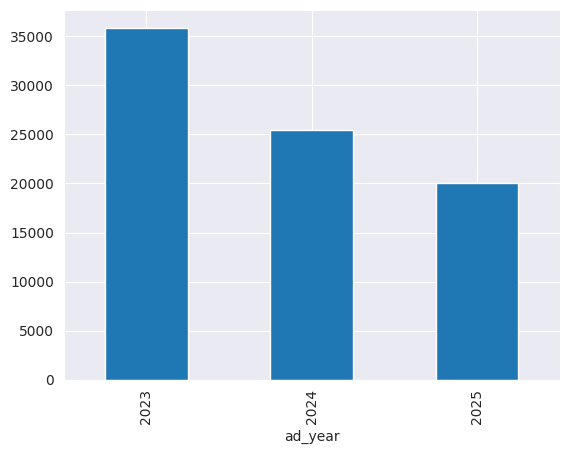

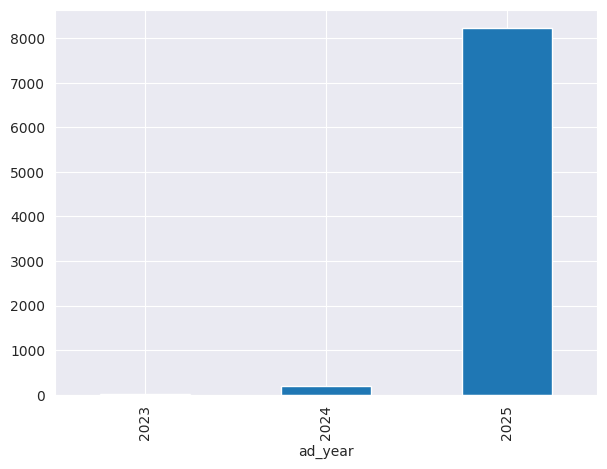

In [350]:
dataset[dataset.brand=='mercedes-benz'].groupby(by=['ad_year'])['raw_price'].agg('median').plot(kind='bar')
plt.figure(figsize = (7,5))
dataset[dataset.brand=='mercedes-benz'].groupby(by=['ad_year'])['raw_price'].agg('count').plot(kind='bar')